In [259]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [260]:
#reading file
df_train = pd.read_csv("D:\\MS Data Science- Simplilearn\\Assignments\\Capstone\\train.csv")
df_test = pd.read_csv("D:\\MS Data Science- Simplilearn\\Assignments\\Capstone\\test.csv")

In [261]:
df_train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [262]:
df_test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [263]:
df_train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [264]:
df_test.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [265]:
len(df_train)

27321

In [266]:
len(df_test)

11709

In [267]:
df_train.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074017    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027488      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [268]:
df_test.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   11709.000000      0.0   11709.0  11709.000000  11709.000000   
mean   257525.004783      NaN     140.0     85.710650     28.489196   
std     21466.372658      NaN       0.0     99.304334     16.607262   
min    220336.000000      NaN     140.0      1.000000      1.000000   
25%    238819.000000      NaN     140.0     29.000000     13.000000   
50%    257651.000000      NaN     140.0     61.000000     28.000000   
75%    276300.000000      NaN     140.0    109.000000     42.000000   
max    294333.000000      NaN     140.0    810.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  11709.000000  11709.000000  11709.000000  11709.000000  1.170900e+04   
mean   50123.418396    593.598514     37.405491    -91.340229  1.095500e+08   
std    29775.134038    232.074263      5.625904     16.407818  7.624940e+08   
min      601.000000    201.000000     17.965835   -166.770979  8.299000e+03   
25%    25570.000000    404.000000     33.919813    -97.816561  1.718660e+06   
50%    47362.000000    612.000000     38.618093    -86.643344  4.835000e+06   
75%    77406.000000    787.000000     41.232973    -79.697311  3.204540e+07   
max    99929.000000    989.000000     64.804269    -65.695344  5.520166e+10   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     11613.000000       11613.000000      11613.000000   
mean   ...        40.111999          40.131864         22.148145   
std    ...         5.851192           7.972026          2.554907   
min    ...        15.360240          12.833330          0.737110   
25%    ...        36.729210          34.750000         21.270920   
50%    ...        40.196960          40.333330         22.472990   
75%    ...        43.496490          45.333330         23.549450   
max    ...        90.107940          90.166670         29.626680   

       female_age_sample_weight  female_age_samples       pct_own  \
count              11613.000000        11613.000000  11587.000000   
mean                 550.411243         2233.003186      0.634194   
std                  280.992521         1072.017063      0.232232   
min                    0.251910            3.000000      0.000000   
25%                  363.225840         1499.000000      0.492500   
50%                  509.103610         2099.000000      0.687640   
75%                  685.883910         2800.000000      0.815235   
max                 4145.557870        15466.000000      1.000000   

            married   married_snp     separated      divorced  
count  11625.000000  11625.000000  11625.000000  11625.000000  
mean       0.505632      0.047960      0.019346      0.099191  
std        0.139774      0.038693      0.021428      0.048525  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.422020      0.020890      0.004500      0.064590  
50%        0.525270      0.038680      0.013870      0.094350  
75%        0.605660      0.065340      0.027910      0.128400  
max        1.000000      0.714290      0.714290      0.362750  

[8 rows x 74 columns]

In [269]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [270]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [271]:
#Setting "UID" as an index
df_train.set_index(keys = ["UID"], inplace = True)
df_test.set_index(keys = ["UID"], inplace = True)

In [272]:
#dropping null and duplicate values
df_train.isnull().sum(axis = 0)

BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 79, dtype: int64

In [273]:
df_test.isnull().sum(axis = 0)

BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
state              0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 79, dtype: int64

In [274]:
len(df_train.columns[df_train.isnull().sum(axis = 0) > 0])

59

In [275]:
df_train.drop(['BLOCKID', 'primary'], axis=1, inplace=True)

In [276]:
null_data = df_train[df_train.isnull().any(axis=1)]
null_data

SUMLEVEL  COUNTYID  STATEID          state state_ab         city  \
UID                                                                        
223593       140        19        4        Arizona       AZ       Tucson   
233040       140       101        8       Colorado       CO       Pueblo   
263292       140        13       34     New Jersey       NJ       Newark   
267158       140        47       36       New York       NY     Brooklyn   
292484       140        25       55      Wisconsin       WI      Madison   
...          ...       ...      ...            ...      ...          ...   
266321       140         5       36       New York       NY        Bronx   
235725       140        57       12        Florida       FL        Tampa   
247777       140        61       21       Kentucky       KY  Brownsville   
266166       140         5       36       New York       NY        Bronx   
251078       140        25       25  Massachusetts       MA       Boston   

                    place  type  zip_code  area_code  ...  female_age_mean  \
UID                                                   ...                    
223593         Littletown   CDP     85734        520  ...         40.02370   
233040        Pueblo City  City     81001        719  ...         20.00784   
263292        Silver Lake  City      7107        973  ...         35.47667   
267158      New York City  City     11215        718  ...              NaN   
292484       Madison City  City     53703        608  ...         22.03226   
...                   ...   ...       ...        ...  ...              ...   
266321  Mount Vernon City  City     10458        718  ...         37.43584   
235725       Pebble Creek  City     33647        813  ...         29.08800   
247777   Brownsville City  City     42210        270  ...         19.39847   
266166       Pelham Manor  City     10462        718  ...         37.70543   
251078          Brookline  City      2124        617  ...         38.36136   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
223593           40.83333           8.49563                  30.01695   
233040           19.25000           4.30291                 172.56153   
263292           35.58333          20.62717                 369.61740   
267158                NaN               NaN                       NaN   
292484           21.08333           5.13435                1365.86300   
...                   ...               ...                       ...   
266321           36.66667          20.24009                 949.65719   
235725           28.08333          14.65116                 144.78344   
247777           19.00000           1.49474                   3.39130   
266166           35.08333          21.49394                 473.55995   
251078           37.50000          17.21372                  41.67597   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
223593               161.0      NaN  0.16308      0.16308    0.02634   0.20499  
233040               309.0  0.00000  0.00000      0.00000    0.00000   0.00000  
263292              1671.0  0.24002  0.37411      0.05579    0.02504   0.07654  
267158                 NaN      NaN      NaN          NaN        NaN       NaN  
292484              1981.0  0.00000  0.00773      0.00000    0.00000   0.01160  
...                    ...      ...      ...          ...        ...       ...  
266321              3921.0  0.07254  0.42468      0.07456    0.03217   0.08100  
235725               648.0  0.00000  0.25806      0.10753    0.10753   0.09946  
247777                 6.0      NaN  0.00000      0.00000    0.00000   0.00000  
266166              2061.0  0.06311  0.51284      0.08899    0.03211   0.02844  
251078                96.0      NaN  0.15530      0.15530    0.13258   0.10985  



In [277]:
round((736 / 27321)*100, 2)

2.69

In [278]:
df_train.shape

(27321, 77)

In [279]:
df_train = pd.concat([df_train, null_data, null_data]).drop_duplicates(keep=False)

In [280]:
df_train.shape

(26585, 77)

In [281]:
len(df_train.columns[df_train.isnull().sum(axis = 0) > 0])

0

In [282]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26585 entries, 267822 to 265371
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SUMLEVEL                     26585 non-null  int64  
 1   COUNTYID                     26585 non-null  int64  
 2   STATEID                      26585 non-null  int64  
 3   state                        26585 non-null  object 
 4   state_ab                     26585 non-null  object 
 5   city                         26585 non-null  object 
 6   place                        26585 non-null  object 
 7   type                         26585 non-null  object 
 8   zip_code                     26585 non-null  int64  
 9   area_code                    26585 non-null  int64  
 10  lat                          26585 non-null  float64
 11  lng                          26585 non-null  float64
 12  ALand                        26585 non-null  float64
 13  AWater    

In [283]:
#4. Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. 
#Perform debt analysis.

In [284]:
#Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.
df_train.nlargest(2500, ['second_mortgage', 'pct_own'])

SUMLEVEL  COUNTYID  STATEID           state state_ab          city  \
UID                                                                          
264403       140        31       34      New Jersey       NJ       Passaic   
289712       140       147       51        Virginia       VA     Farmville   
222830       140        13        4         Arizona       AZ    Scottsdale   
251185       140        27       25   Massachusetts       MA     Worcester   
278178       140       101       42    Pennsylvania       PA  Philadelphia   
...          ...       ...      ...             ...      ...           ...   
245335       140         3       18         Indiana       IN    Fort Wayne   
260417       140        81       37  North Carolina       NC    High Point   
286364       140       257       48           Texas       TX      Crandall   
287041       140       397       48           Texas       TX    Royse City   
225435       140        37        6      California       CA   Los Angeles   

                      place     type  zip_code  area_code  ...  \
UID                                                        ...   
264403        Garfield City     City      7055        973  ...   
289712            Farmville     Town     23901        434  ...   
222830           Tempe City      CDP     85257        480  ...   
251185       Worcester City     City      1610        508  ...   
278178           Millbourne  Borough     19104        215  ...   
...                     ...      ...       ...        ...  ...   
245335      Fort Wayne City     City     46814        260  ...   
260417            Jamestown  Village     27265        336  ...   
286364                Talty     Town     75114        972  ...   
287041            Fate City     Town     75189        972  ...   
225435  South Pasadena City     City     90042        323  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
264403         26.57222           25.66667          19.34716   
289712         19.58762           19.16667           4.00258   
222830         31.91429           30.83333          14.45269   
251185         30.60147           26.16667          19.21553   
278178         22.42708           21.08333           7.39823   
...                 ...                ...               ...   
245335         36.26617           37.66667          22.54754   
260417         37.43896           35.00000          21.50541   
286364         32.84647           32.75000          20.34275   
287041         32.19408           33.41667          20.08021   
225435         32.26462           30.83333          20.41615   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
264403                 553.14428              2526.0  0.01157  0.32288   
289712                 673.39577              1124.0  0.62069  0.03612   
222830                 229.39846               981.0  0.05660  0.21531   
251185                 262.09529               994.0  0.20247  0.37844   
278178                2280.04214              3446.0  0.05041  0.07505   
...                          ...                 ...      ...      ...   
245335                 750.45868              3351.0  0.87611  0.85458   
260417                 449.31863              2081.0  0.44992  0.56118   
286364                 965.04813              4358.0  0.89705  0.64629   
287041                1130.12241              5144.0  0.74929  0.59892   
225435                 411.54960              1758.0  0.29012  0.44686   

        married_snp  separated  divorced  
UID                                       
264403      0.04792    0.00913   0.04678  
289712      0.01806    0.01806   0.00000  
222830      0.10204    0.07347   0.20816  
251185      0.11976    0.09341   0.10539  
278178      0.03665    0.00000   0.01378  
...             ...        ...       

In [285]:
top_2500 = df_train[["state", "city", "lat", "lng", "second_mortgage", "pct_own"]]
top_2500_sorted = top_2500.sort_values(by = ["second_mortgage"], ascending = False)
top_2500_sorted

state          city        lat         lng  second_mortgage  \
UID                                                                           
264403     New Jersey       Passaic  40.867944  -74.114633          0.60870   
289712       Virginia     Farmville  37.297357  -78.396452          0.50000   
222830        Arizona    Scottsdale  33.458658 -111.955104          0.43750   
251185  Massachusetts     Worcester  42.254262  -71.800347          0.43363   
278178   Pennsylvania  Philadelphia  39.952954  -75.202767          0.39024   
...               ...           ...        ...         ...              ...   
259219    Mississippi     Woodville  31.193052  -91.173135          0.00000   
267207       New York      Brooklyn  40.637816  -73.984281          0.00000   
239433        Georgia        Albany  31.585357  -84.157534          0.00000   
236028        Florida    Fort Myers  26.678652  -81.791467          0.00000   
226697     California   Los Angeles  33.947117 -118.231420          0.00000   

        pct_own  
UID              
264403  0.01157  
289712  0.62069  
222830  0.05660  
251185  0.20247  
278178  0.05041  
...         ...  
259219  0.67842  
267207  0.17928  
239433  0.10559  
236028  0.89606  
226697  0.36098  

[26585 rows x 6 columns]

In [286]:
top_2500_sorted = top_2500_sorted[top_2500_sorted.pct_own > 0.1]
top_2500_sorted

state         city        lat         lng  second_mortgage  \
UID                                                                          
289712       Virginia    Farmville  37.297357  -78.396452          0.50000   
251185  Massachusetts    Worcester  42.254262  -71.800347          0.43363   
269323       New York       Corona  40.751809  -73.853582          0.31818   
251324       Maryland  Glen Burnie  39.127273  -76.635265          0.30212   
235788        Florida        Tampa  28.029063  -82.495395          0.28972   
...               ...          ...        ...         ...              ...   
259219    Mississippi    Woodville  31.193052  -91.173135          0.00000   
267207       New York     Brooklyn  40.637816  -73.984281          0.00000   
239433        Georgia       Albany  31.585357  -84.157534          0.00000   
236028        Florida   Fort Myers  26.678652  -81.791467          0.00000   
226697     California  Los Angeles  33.947117 -118.231420          0.00000   

        pct_own  
UID              
289712  0.62069  
251185  0.20247  
269323  0.15618  
251324  0.22380  
235788  0.11618  
...         ...  
259219  0.67842  
267207  0.17928  
239433  0.10559  
236028  0.89606  
226697  0.36098  

[26215 rows x 6 columns]

In [287]:
top_2500_sorted[:2500]

state          city        lat         lng  second_mortgage  \
UID                                                                           
289712       Virginia     Farmville  37.297357  -78.396452          0.50000   
251185  Massachusetts     Worcester  42.254262  -71.800347          0.43363   
269323       New York        Corona  40.751809  -73.853582          0.31818   
251324       Maryland   Glen Burnie  39.127273  -76.635265          0.30212   
235788        Florida         Tampa  28.029063  -82.495395          0.28972   
...               ...           ...        ...         ...              ...   
230480     California       Manteca  37.732143 -121.242902          0.06814   
236853        Florida    Cutler Bay  25.550391  -80.347791          0.06813   
271050           Ohio    Middletown  39.556756  -84.443252          0.06812   
287458          Texas        Keller  32.913822  -97.204310          0.06812   
262770     New Jersey  Mays Landing  39.432879  -74.686137          0.06810   

        pct_own  
UID              
289712  0.62069  
251185  0.20247  
269323  0.15618  
251324  0.22380  
235788  0.11618  
...         ...  
230480  0.67116  
236853  0.50519  
271050  0.92888  
287458  0.97987  
262770  0.70642  

[2500 rows x 6 columns]

In [288]:
fig = go.Figure(data=go.Scattergeo(
    lat = top_2500_sorted["lat"],
    lon = top_2500_sorted["lng"]),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations with second mortgage is the highest and percent ownership is above 10 percent')
fig.show()

In [289]:
#Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.
df_train["bad_debt"] = df_train['second_mortgage'] + df_train['home_equity'] - df_train['home_equity_second_mortgage']
df_train

SUMLEVEL  COUNTYID  STATEID         state state_ab         city  \
UID                                                                       
267822       140        53       36      New York       NY     Hamilton   
246444       140       141       18       Indiana       IN   South Bend   
245683       140        63       18       Indiana       IN     Danville   
279653       140       127       72   Puerto Rico       PR     San Juan   
247218       140       161       20        Kansas       KS    Manhattan   
...          ...       ...      ...           ...      ...          ...   
279212       140        43       72   Puerto Rico       PR        Coamo   
277856       140        91       42  Pennsylvania       PA    Blue Bell   
233000       140        87        8      Colorado       CO      Weldona   
287425       140       439       48         Texas       TX  Colleyville   
265371       140         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code  ...  \
UID                                                     ...   
267822          Hamilton     City     13346        315  ...   
246444          Roseland     City     46616        574  ...   
245683          Danville     City     46122        317  ...   
279653          Guaynabo    Urban       927        787  ...   
247218    Manhattan City     City     66502        785  ...   
...                  ...      ...       ...        ...  ...   
279212             Coamo    Urban       769        787  ...   
277856         Blue Bell  Borough     19422        215  ...   
233000      Saddle Ridge     City     80653        970  ...   
287425  Colleyville City     Town     76034        817  ...   
265371          Paradise     City     89123        702  ...   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   
...                   ...               ...                       ...   
279212           40.16667          24.79821                 230.87898   
277856           39.50000          21.84826                 496.20427   
233000           46.33333          23.40858                 316.52078   
287425           43.41667          21.36235                1373.94120   
265371           29.83333          19.77208                 526.73261   

        female_age_samples  pct_own  married  married_snp  separated  \
UID                                                                    
267822              2618.0  0.79046  0.57851      0.01882    0.01240   
246444              1284.0  0.52483  0.34886      0.01426    0.01426   
245683              3238.0  0.85331  0.64745      0.02830    0.01607   
279653              1559.0  0.65037  0.47257      0.02021    0.02021   
247218              3051.0  0.13046  0.12356      0.00000    0.00000   
...                    ...      ...      ...          ...        ...   
279212               938.0  0.60422  0.24603      0.03042    0.02249   
277856              2039.0  0.68072  0.61127      0.05003    0.02473   
233000              1364.0  0.78508  0.70451      0.01386    0.00520   
287425              5815.0  0.93970  0.75503      0.02287    0.00915   
265371              1911.0  0.27912  0.34426      0.03825    0.03005   

        divorced  bad_debt  
UID                         
267822   0.08770   0.09408  
246444   0.09030   0.04274  
245683   0.10657   0.09512  
279653   0.10106   0.01086  
247218   0.03109   0.05426  
...          ...       ...  
279212   0.14683   0.00000  
277856   0.04888   0.20908  
233000   0.07712   0.07857  
287425

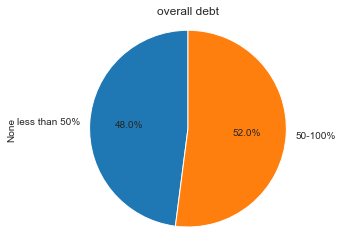

In [290]:
#Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).
df_train['bins'] = pd.cut(df_train['bad_debt'], bins=[0,0.10,1], labels=["less than 50%","50-100%"])
df_train.groupby(['bins']).size().plot(kind='pie', subplots=True, startangle = 90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('overall debt')
plt.show()

In [291]:
#•	Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities. 
second_mortgage = df_train[["state", "city", "second_mortgage"]]
second_mortgage

state         city  second_mortgage
UID                                               
267822      New York     Hamilton          0.02077
246444       Indiana   South Bend          0.02222
245683       Indiana     Danville          0.00000
279653   Puerto Rico     San Juan          0.01086
247218        Kansas    Manhattan          0.05426
...              ...          ...              ...
279212   Puerto Rico        Coamo          0.00000
277856  Pennsylvania    Blue Bell          0.02112
233000      Colorado      Weldona          0.02024
287425         Texas  Colleyville          0.07550
265371        Nevada    Las Vegas          0.01412

[26585 rows x 3 columns]

In [292]:
second_mortgage["city"].value_counts()[:10].index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

In [293]:
cities = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']

In [294]:
boxplot_df = second_mortgage[second_mortgage['city'].isin (cities)]

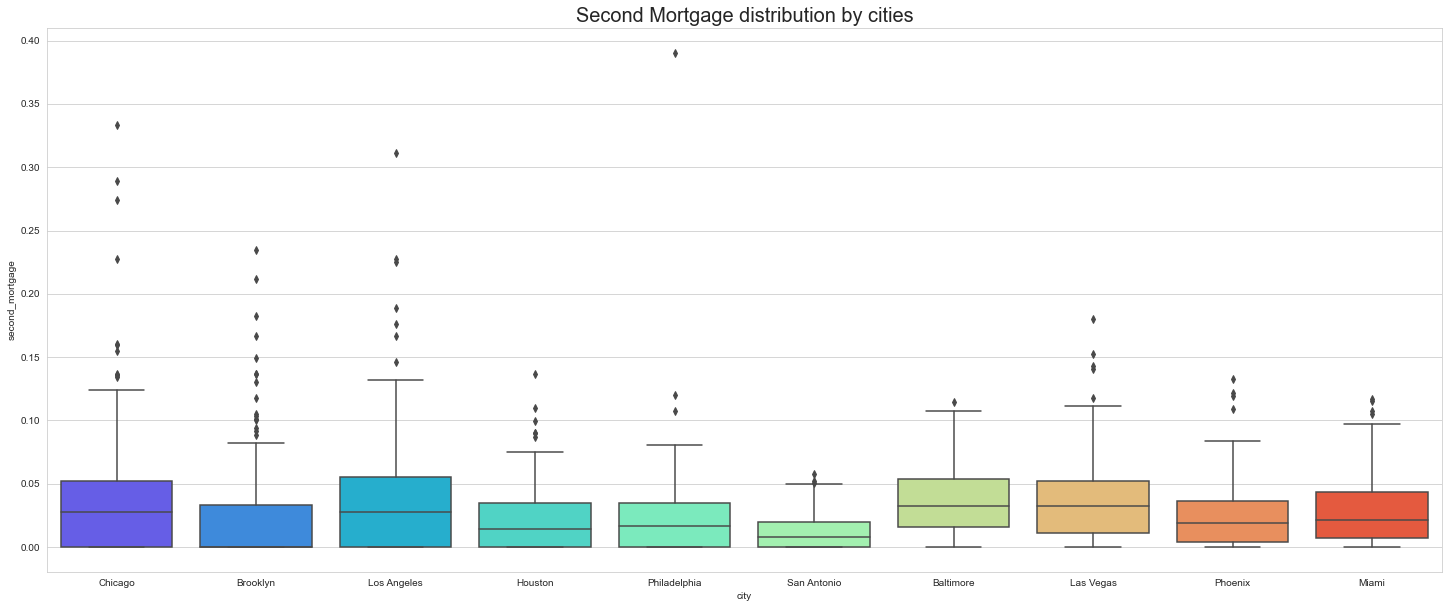

In [295]:
plt.figure(figsize = (25, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Second Mortgage distribution by cities', fontsize = 20)
plt.show()

In [296]:
home_equity = df_train[["state", "city", "home_equity"]]
home_equity

state         city  home_equity
UID                                           
267822      New York     Hamilton      0.08919
246444       Indiana   South Bend      0.04274
245683       Indiana     Danville      0.09512
279653   Puerto Rico     San Juan      0.01086
247218        Kansas    Manhattan      0.05426
...              ...          ...          ...
279212   Puerto Rico        Coamo      0.00000
277856  Pennsylvania    Blue Bell      0.19641
233000      Colorado      Weldona      0.07857
287425         Texas  Colleyville      0.12556
265371        Nevada    Las Vegas      0.18362

[26585 rows x 3 columns]

In [297]:
home_equity["city"].value_counts()[:10].index

Index(['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami'],
      dtype='object')

In [298]:
boxplot_df = home_equity[home_equity['city'].isin (cities)]

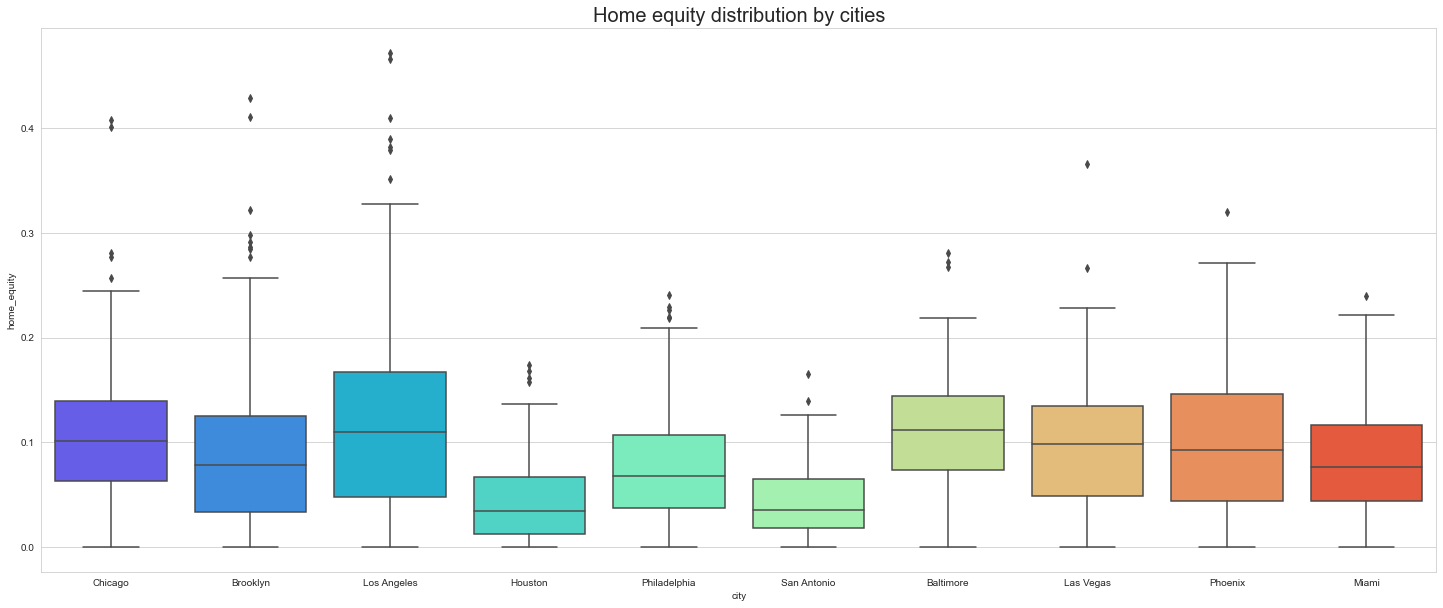

In [299]:
plt.figure(figsize = (25, 10))
sns.boxplot(x='city', y='home_equity',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Home equity distribution by cities', fontsize = 20)
plt.show()

In [300]:
debt = df_train[["state", "city", "debt"]]
debt

state         city     debt
UID                                       
267822      New York     Hamilton  0.52963
246444       Indiana   South Bend  0.60855
245683       Indiana     Danville  0.73484
279653   Puerto Rico     San Juan  0.52714
247218        Kansas    Manhattan  0.51938
...              ...          ...      ...
279212   Puerto Rico        Coamo  0.11694
277856  Pennsylvania    Blue Bell  0.65364
233000      Colorado      Weldona  0.58095
287425         Texas  Colleyville  0.65722
265371        Nevada    Las Vegas  0.65537

[26585 rows x 3 columns]

In [301]:
boxplot_df = debt[debt['city'].isin (cities)]

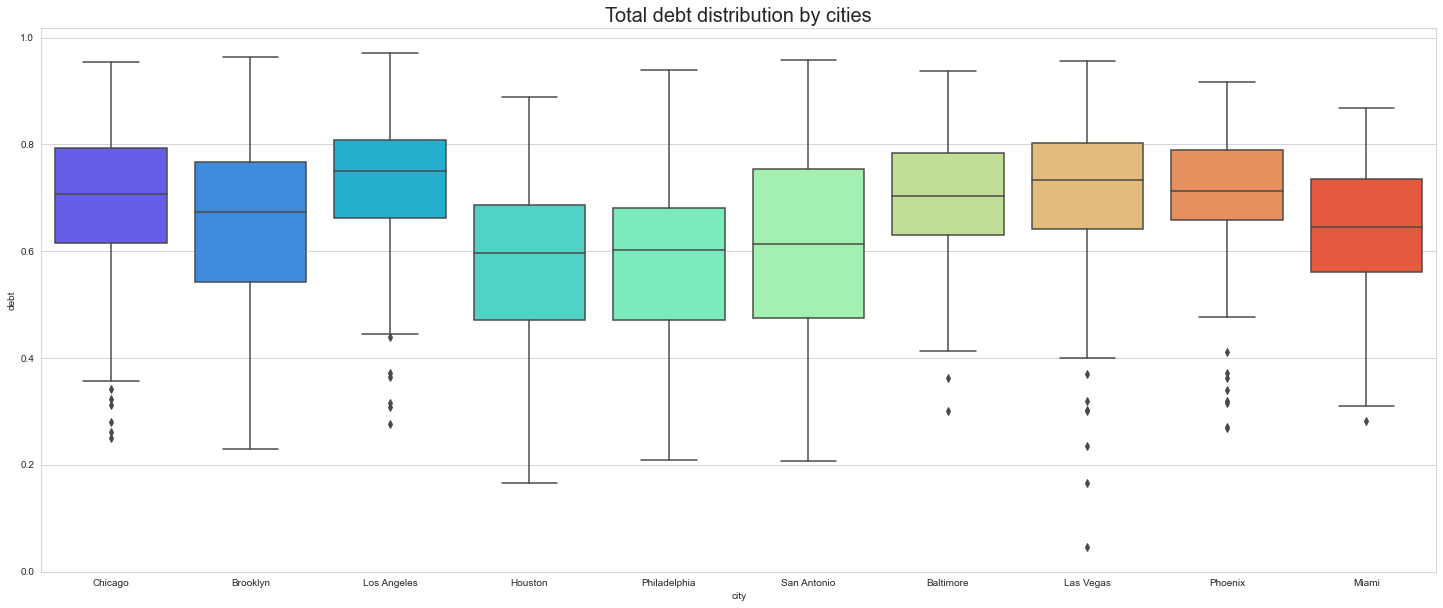

In [302]:
plt.figure(figsize = (25, 10))
sns.boxplot(x='city', y='debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Total debt distribution by cities', fontsize = 20)
plt.show()

In [303]:
bad_debt = df_train[["state", "city", "bad_debt"]]
bad_debt

state         city  bad_debt
UID                                        
267822      New York     Hamilton   0.09408
246444       Indiana   South Bend   0.04274
245683       Indiana     Danville   0.09512
279653   Puerto Rico     San Juan   0.01086
247218        Kansas    Manhattan   0.05426
...              ...          ...       ...
279212   Puerto Rico        Coamo   0.00000
277856  Pennsylvania    Blue Bell   0.20908
233000      Colorado      Weldona   0.07857
287425         Texas  Colleyville   0.14305
265371        Nevada    Las Vegas   0.18362

[26585 rows x 3 columns]

In [304]:
boxplot_df = bad_debt[bad_debt['city'].isin (cities)]

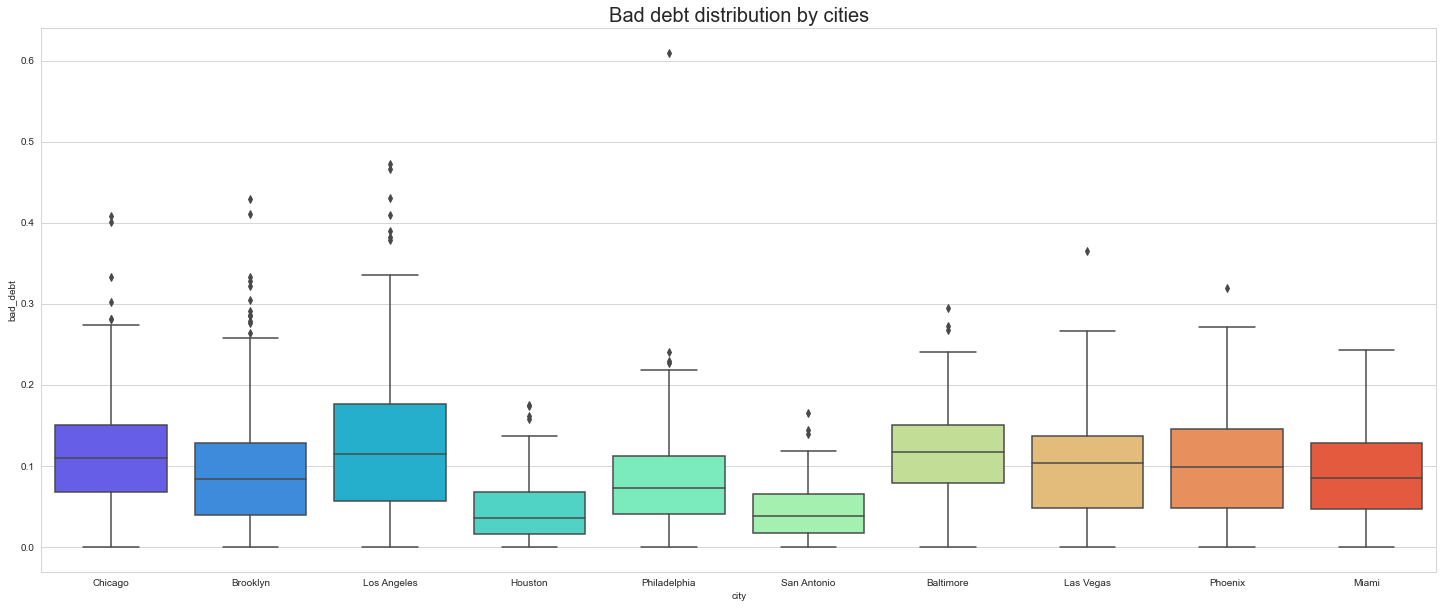

In [305]:
plt.figure(figsize = (25, 10))
sns.boxplot(x='city', y='bad_debt',data=boxplot_df,palette='rainbow', order = ['Chicago', 'Brooklyn', 'Los Angeles', 'Houston', 'Philadelphia',
       'San Antonio', 'Baltimore', 'Las Vegas', 'Phoenix', 'Miami']).set_title('Bad debt distribution by cities', fontsize = 20)
plt.show()

In [306]:
df_train['remaining_income'] = df_train['family_median'] - df_train['hi_median']
df_train

SUMLEVEL  COUNTYID  STATEID         state state_ab         city  \
UID                                                                       
267822       140        53       36      New York       NY     Hamilton   
246444       140       141       18       Indiana       IN   South Bend   
245683       140        63       18       Indiana       IN     Danville   
279653       140       127       72   Puerto Rico       PR     San Juan   
247218       140       161       20        Kansas       KS    Manhattan   
...          ...       ...      ...           ...      ...          ...   
279212       140        43       72   Puerto Rico       PR        Coamo   
277856       140        91       42  Pennsylvania       PA    Blue Bell   
233000       140        87        8      Colorado       CO      Weldona   
287425       140       439       48         Texas       TX  Colleyville   
265371       140         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code  ...  \
UID                                                     ...   
267822          Hamilton     City     13346        315  ...   
246444          Roseland     City     46616        574  ...   
245683          Danville     City     46122        317  ...   
279653          Guaynabo    Urban       927        787  ...   
247218    Manhattan City     City     66502        785  ...   
...                  ...      ...       ...        ...  ...   
279212             Coamo    Urban       769        787  ...   
277856         Blue Bell  Borough     19422        215  ...   
233000      Saddle Ridge     City     80653        970  ...   
287425  Colleyville City     Town     76034        817  ...   
265371          Paradise     City     89123        702  ...   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
267822                 685.33845              2618.0  0.79046  0.57851   
246444                 267.23367              1284.0  0.52483  0.34886   
245683                 707.01963              3238.0  0.85331  0.64745   
279653                 362.20193              1559.0  0.65037  0.47257   
247218                1854.48652              3051.0  0.13046  0.12356   
...                          ...                 ...      ...      ...   
279212                 230.87898               938.0  0.60422  0.24603   
277856                 496.20427              2039.0  0.68072  0.61127   
233000                 316.52078              1364.0  0.78508  0.70451   
287425                1373.94120              5815.0  0.93970  0.75503   
265371                 526.73261              1911.0  0.27912  0.34426   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   
...             ...        ...       ...       ...            ...   
279212      0.03042    0.02249   0.14683   0.00000            NaN   
277856      0.05003    0.02473   0.04888   0.20908        50-100%   
233000      0.01386    0.00520   0.07712   0.07857  less than 50%   
287425      0.02287    0.00915   0.05261   0.14305        50-100%   
265371      0.03825    0.03005   0.13320   0.18362        50-100%   

        remaining_income  
UID                       
267822            5125.0  
246444            7837.0  
245683           10431.0  
279653            6554.0  
247218           27775.0  
...                  ...  
279212            3443.0  
277856            5029.0  
233000            8514.0  
287425           27404.0  
265371            4472.0  


In [307]:
#•	Create a collated income distribution chart for family income, house hold income and remaining income. 
income_chart = round(df_train[['city', 'hi_median', 'family_median', 'remaining_income']], 2)
income_chart

city  hi_median  family_median  remaining_income
UID                                                            
267822     Hamilton    48120.0        53245.0            5125.0
246444   South Bend    35186.0        43023.0            7837.0
245683     Danville    74964.0        85395.0           10431.0
279653     San Juan    37845.0        44399.0            6554.0
247218    Manhattan    22497.0        50272.0           27775.0
...             ...        ...            ...               ...
279212        Coamo    13317.0        16760.0            3443.0
277856    Blue Bell   108284.0       113313.0            5029.0
233000      Weldona    73350.0        81864.0            8514.0
287425  Colleyville   148548.0       175952.0           27404.0
265371    Las Vegas    38072.0        42544.0            4472.0

[26585 rows x 4 columns]

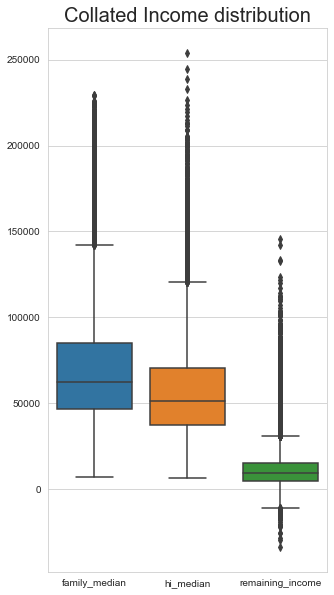

In [308]:
sns.set_style("whitegrid")
plt.figure(figsize = (5, 10))
sns.boxplot(data=df_train[['family_median', 'hi_median', 'remaining_income']]).set_title('Collated Income distribution', fontsize = 20)
plt.show()

In [309]:
df_train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type  zip_code  area_code  ...  \
UID                                                 ...   
267822        Hamilton   City     13346        315  ...   
246444        Roseland   City     46616        574  ...   
245683        Danville   City     46122        317  ...   
279653        Guaynabo  Urban       927        787  ...   
247218  Manhattan City   City     66502        785  ...   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
267822                 685.33845              2618.0  0.79046  0.57851   
246444                 267.23367              1284.0  0.52483  0.34886   
245683                 707.01963              3238.0  0.85331  0.64745   
279653                 362.20193              1559.0  0.65037  0.47257   
247218                1854.48652              3051.0  0.13046  0.12356   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   

        remaining_income  
UID                       
267822            5125.0  
246444            7837.0  
245683           10431.0  
279653            6554.0  
247218           27775.0  

[5 rows x 80 columns]

In [310]:
#Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements): 

In [311]:
#Population density (hint-use ‘pop’ and ‘Aland’ to calculate)
df_train['pop_density'] = df_train['pop'] / df_train['ALand']
df_train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type  zip_code  area_code  ...  female_age_samples  \
UID                                                 ...                       
267822        Hamilton   City     13346        315  ...              2618.0   
246444        Roseland   City     46616        574  ...              1284.0   
245683        Danville   City     46122        317  ...              3238.0   
279653        Guaynabo  Urban       927        787  ...              1559.0   
247218  Manhattan City   City     66502        785  ...              3051.0   

        pct_own  married  married_snp  separated  divorced  bad_debt  \
UID                                                                    
267822  0.79046  0.57851      0.01882    0.01240   0.08770   0.09408   
246444  0.52483  0.34886      0.01426    0.01426   0.09030   0.04274   
245683  0.85331  0.64745      0.02830    0.01607   0.10657   0.09512   
279653  0.65037  0.47257      0.02021    0.02021   0.10106   0.01086   
247218  0.13046  0.12356      0.00000    0.00000   0.03109   0.05426   

                 bins  remaining_income  pop_density  
UID                                                   
267822  less than 50%            5125.0     0.000026  
246444  less than 50%            7837.0     0.001687  
245683  less than 50%           10431.0     0.000099  
279653  less than 50%            6554.0     0.002442  
247218  less than 50%           27775.0     0.002207  

[5 rows x 81 columns]

In [312]:
#median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)
df_train['median_age'] = (df_train['male_age_median'] *  df_train['male_pop'] + df_train['female_age_median'] *  df_train['female_pop'])  / df_train['pop']
df_train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type  zip_code  area_code  ...  pct_own  married  \
UID                                                 ...                     
267822        Hamilton   City     13346        315  ...  0.79046  0.57851   
246444        Roseland   City     46616        574  ...  0.52483  0.34886   
245683        Danville   City     46122        317  ...  0.85331  0.64745   
279653        Guaynabo  Urban       927        787  ...  0.65037  0.47257   
247218  Manhattan City   City     66502        785  ...  0.13046  0.12356   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   

        remaining_income  pop_density  median_age  
UID                                                
267822            5125.0     0.000026   44.667430  
246444            7837.0     0.001687   34.722748  
245683           10431.0     0.000099   41.774472  
279653            6554.0     0.002442   49.879012  
247218           27775.0     0.002207   21.965629  

[5 rows x 82 columns]

In [313]:
df_train.nlargest(300, 'pop_density')

SUMLEVEL  COUNTYID  STATEID       state state_ab         city  \
UID                                                                     
268455       140        61       36    New York       NY     New York   
268575       140        61       36    New York       NY     New York   
268443       140        61       36    New York       NY     New York   
268451       140        61       36    New York       NY     New York   
266311       140         5       36    New York       NY        Bronx   
...          ...       ...      ...         ...      ...          ...   
263677       140        17       34  New Jersey       NJ   Guttenberg   
267741       140        47       36    New York       NY     Brooklyn   
263568       140        17       34  New Jersey       NJ  Jersey City   
267025       140        47       36    New York       NY     Brooklyn   
267242       140        47       36    New York       NY     Brooklyn   

                    place  type  zip_code  area_code  ...  pct_own  married  \
UID                                                   ...                     
268455      New York City  City     10028        212  ...  0.29363  0.48824   
268575  Mount Vernon City  City     10032        212  ...  0.00502  0.37278   
268443      New York City  City     10021        212  ...  0.37184  0.54204   
268451      New York City  City     10021        212  ...  0.39031  0.47416   
266311  Mount Vernon City  City     10468        718  ...  0.02270  0.45411   
...                   ...   ...       ...        ...  ...      ...      ...   
263677         Guttenberg  City      7093        201  ...  0.30525  0.38160   
267741      New York City  City     11207        718  ...  0.33664  0.40030   
263568       Hoboken City  City      7307        201  ...  0.30253  0.51406   
267025      New York City  City     11201        718  ...  0.57165  0.51287   
267242      New York City  City     11204        718  ...  0.32768  0.67203   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
268455      0.01074    0.00000   0.05067   0.13871        50-100%   
268575      0.15363    0.04368   0.10696   0.00000            NaN   
268443      0.03614    0.01992   0.08640   0.00000            NaN   
268451      0.04782    0.01247   0.10199   0.02855  less than 50%   
266311      0.13699    0.02260   0.03767   0.00000            NaN   
...             ...        ...       ...       ...            ...   
263677      0.11481    0.03327   0.07502   0.03158  less than 50%   
267741      0.09859    0.06820   0.10971   0.02475  less than 50%   
263568      0.10630    0.02587   0.01687   0.03091  less than 50%   
267025      0.10803    0.00000   0.06865   0.05894  less than 50%   
267242      0.04237    0.01525   0.02712   0.05588  less than 50%   

        remaining_income  pop_density  median_age  
UID                                                
268455           94422.0     0.072283   36.438498  
268575            3014.0     0.071976   34.289016  
268443          117275.0     0.067666   39.723342  
268451           90966.0     0.064298   40.535357  
266311            1884.0     0.062787   27.161585  
...                  ...          ...         ...  
263677            2001.0     0.020816   33.830150  
267741            6222.0     0.020788   32.245147  
263568            7855.0     0.020751   31.434087  
267025           74849.0     0.020711   45.469331  
267242           15787.0     0.020603   40.336548  

[300 rows x 82 columns]

In [314]:
list(df_train.nlargest(300, 'pop_density').state.unique())

['New York',
 'California',
 'Illinois',
 'Hawaii',
 'New Jersey',
 'Massachusetts',
 'District of Columbia',
 'Virginia',
 'Pennsylvania']

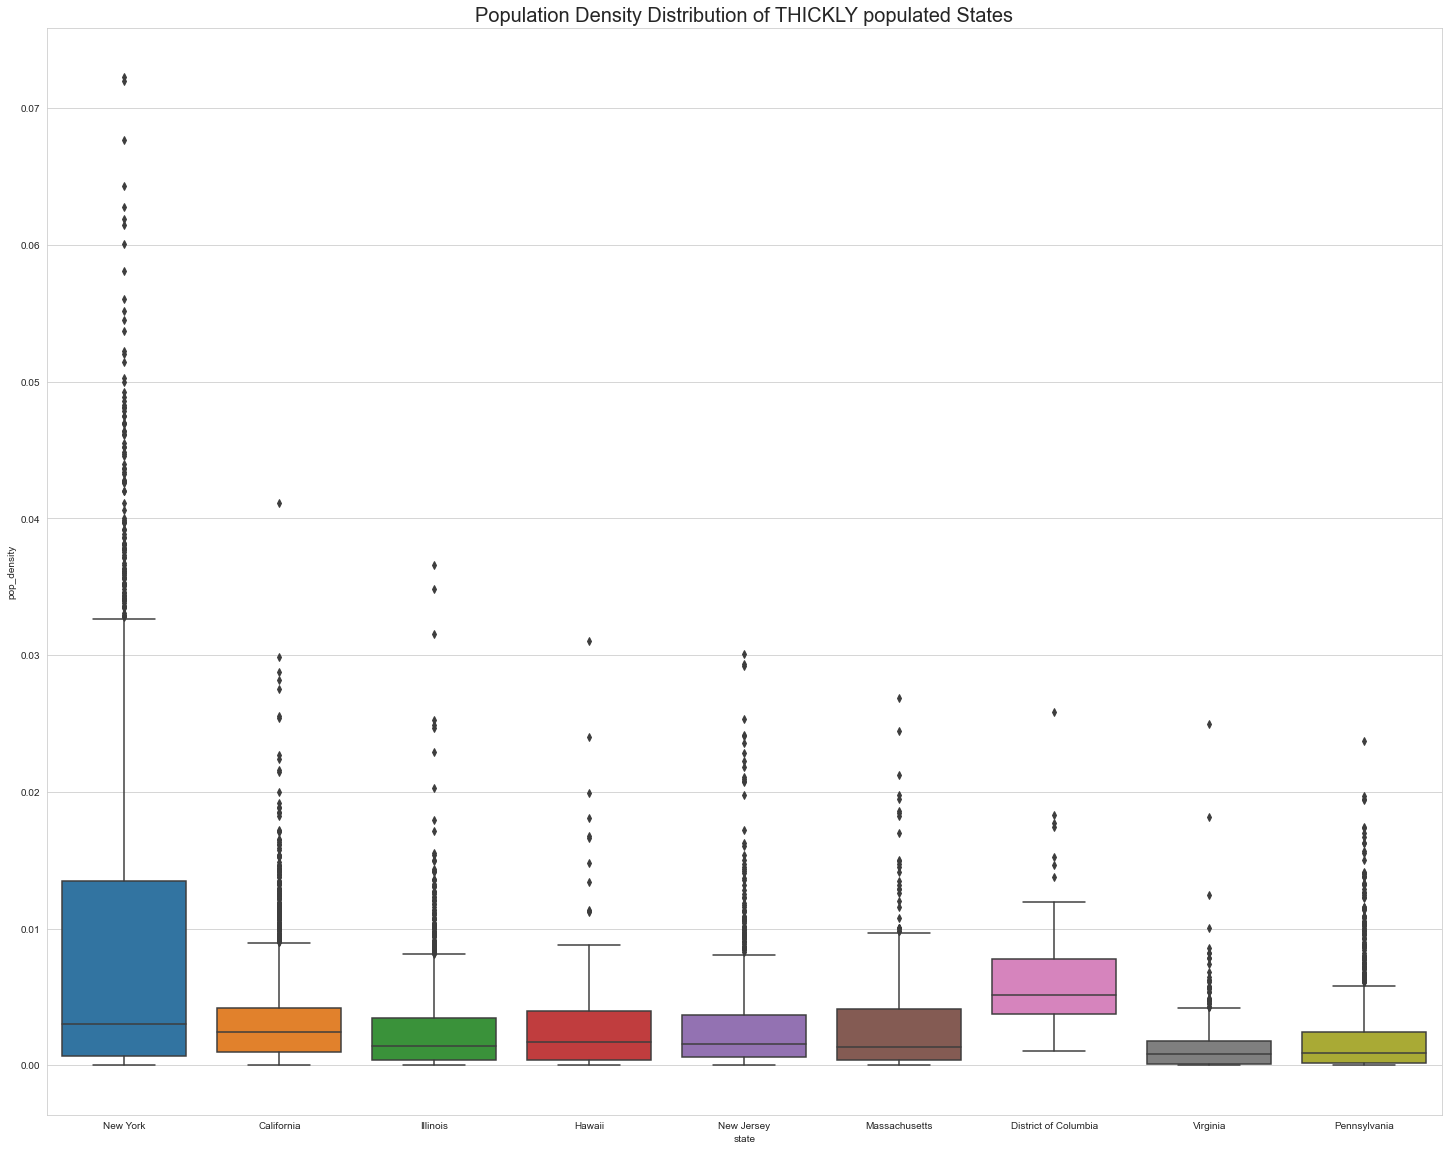

In [315]:
plt.figure(figsize = (25, 20))
sns.boxplot(x = 'state', y = 'pop_density', data=df_train.nlargest(26585, 'pop_density'), order = ['New York', 'California', 'Illinois', 'Hawaii', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Virginia',
                                                                                                                                                                            'Pennsylvania']).set_title('Population Density Distribution of THICKLY populated States', fontsize = 20)
plt.show()

In [316]:
list(df_train.nsmallest(300, 'pop_density').state.unique())

['Alaska',
 'Montana',
 'Utah',
 'Oregon',
 'Nevada',
 'Colorado',
 'Idaho',
 'California',
 'New Mexico',
 'Maine',
 'South Dakota',
 'Wyoming',
 'Nebraska',
 'Texas',
 'Kansas',
 'North Dakota',
 'Arizona',
 'Washington',
 'New York',
 'Oklahoma',
 'Minnesota',
 'Louisiana',
 'Michigan',
 'Florida',
 'Wisconsin']

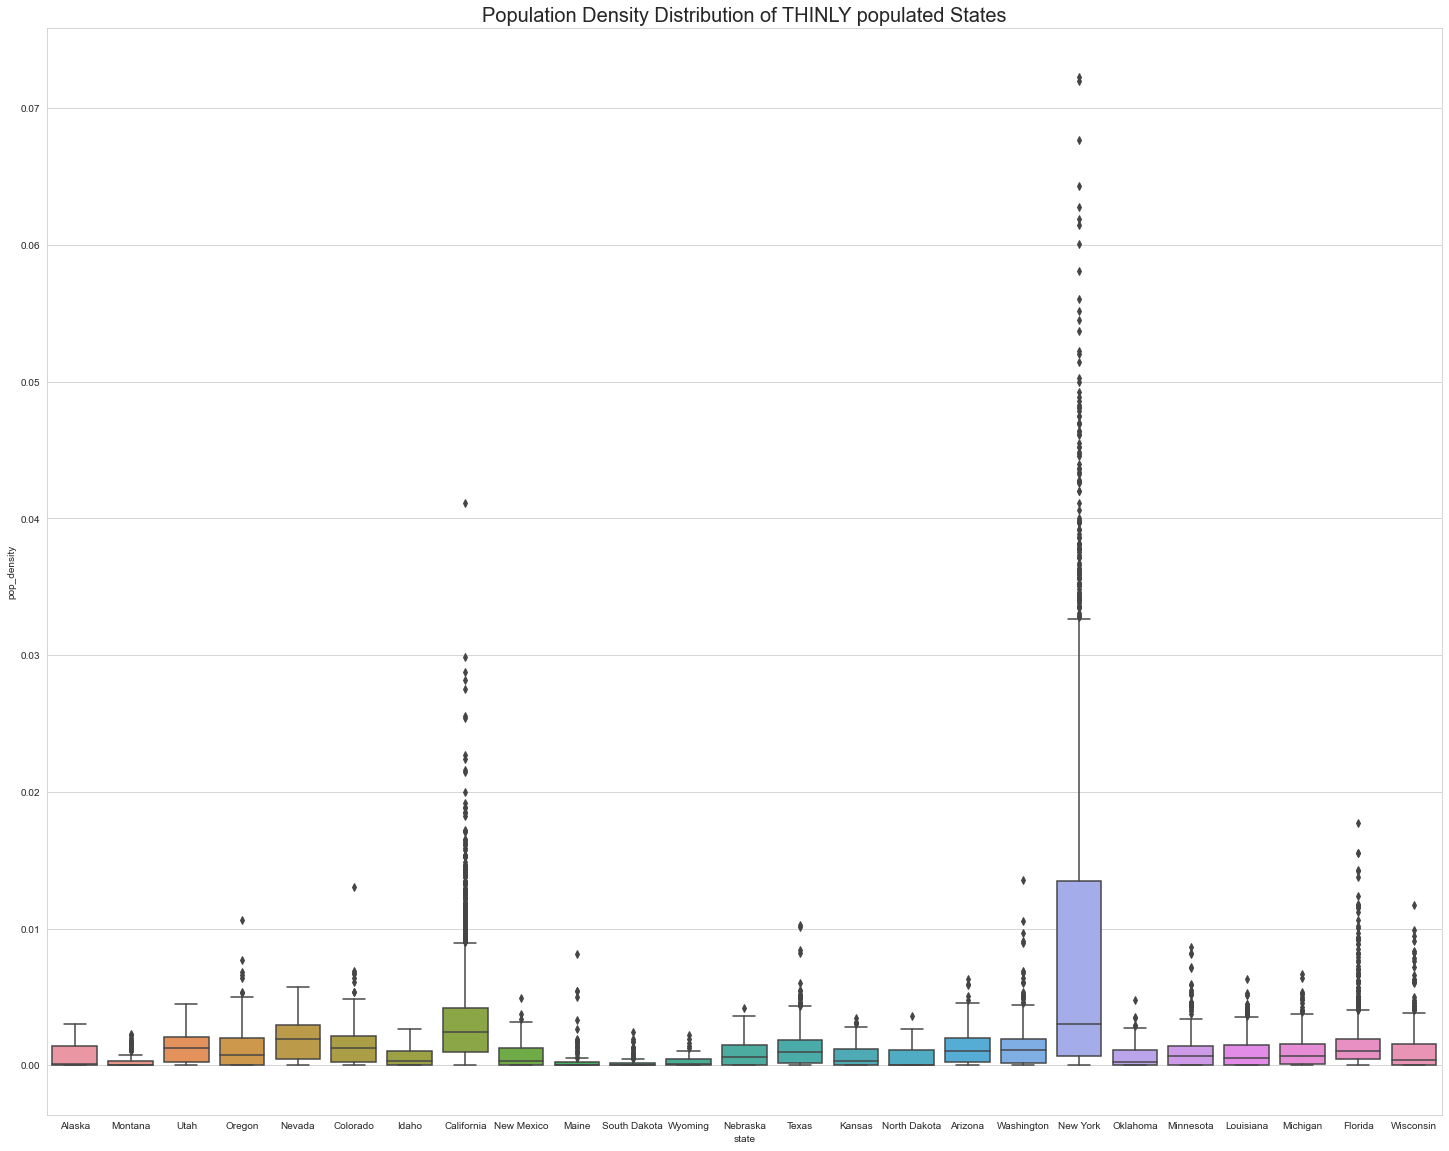

In [317]:
sns.set_style("whitegrid")
plt.figure(figsize = (25, 20))
sns.boxplot(x = 'state', y = 'pop_density', data=df_train.nsmallest(26585, 'pop_density'), order = ['Alaska', 'Montana', 'Utah', 'Oregon', 'Nevada', 'Colorado', 'Idaho', 'California', 'New Mexico',
                                                                                                                                                                                 'Maine', 'South Dakota', 'Wyoming', 'Nebraska', 'Texas', 'Kansas', 'North Dakota', 'Arizona',
                                                                                                                                                                                 'Washington', 'New York', 'Oklahoma', 'Minnesota', 'Louisiana', 'Michigan', 'Florida', 'Wisconsin']).set_title('Population Density Distribution of THINLY populated States', fontsize = 20)
plt.show()

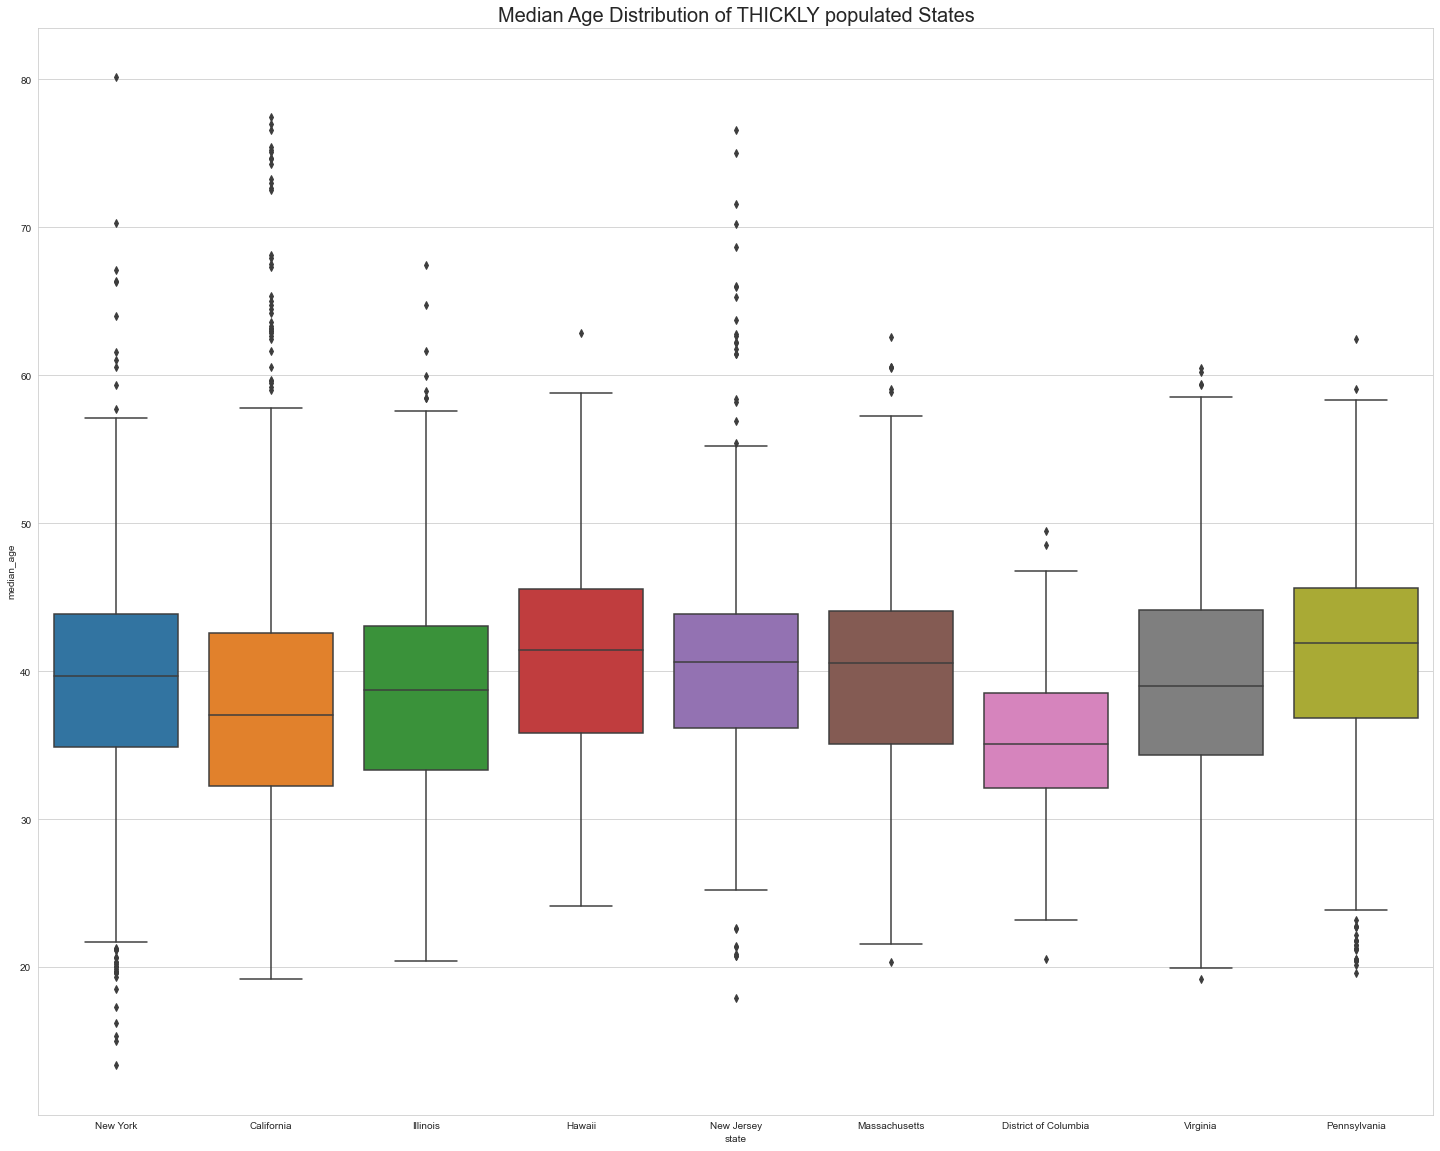

In [318]:
plt.figure(figsize = (25, 20))
sns.boxplot(x = 'state', y = 'median_age', data=df_train.nlargest(26585, 'median_age'), order = ['New York', 'California', 'Illinois', 'Hawaii', 'New Jersey', 'Massachusetts', 'District of Columbia', 'Virginia',
                                                                                                                                                                            'Pennsylvania']).set_title('Median Age Distribution of THICKLY populated States', fontsize = 20)
plt.show()

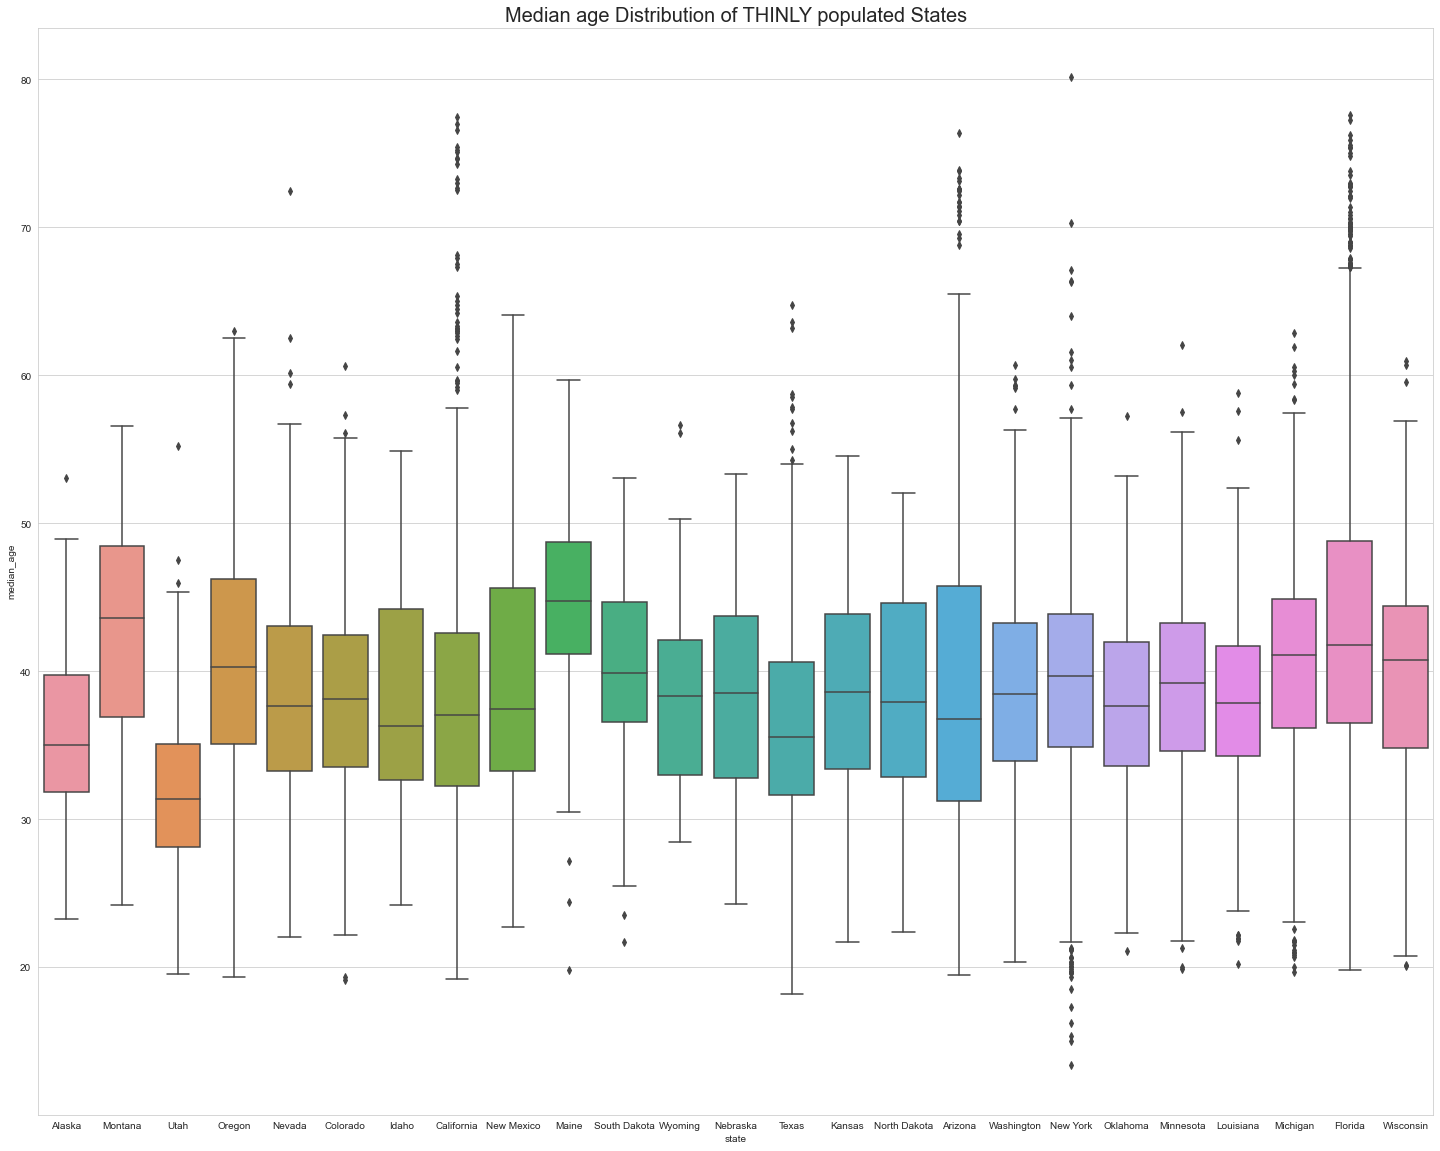

In [319]:
sns.set_style("whitegrid")
plt.figure(figsize = (25, 20))
sns.boxplot(x = 'state', y = 'median_age', data=df_train.nsmallest(26585, 'median_age'), order = ['Alaska', 'Montana', 'Utah', 'Oregon', 'Nevada', 'Colorado', 'Idaho', 'California', 'New Mexico',
                                                                                                                                                                                 'Maine', 'South Dakota', 'Wyoming', 'Nebraska', 'Texas', 'Kansas', 'North Dakota', 'Arizona',
                                                                                                                                                                                 'Washington', 'New York', 'Oklahoma', 'Minnesota', 'Louisiana', 'Michigan', 'Florida', 'Wisconsin']).set_title('Median age Distribution of THINLY populated States', fontsize = 20)
plt.show()

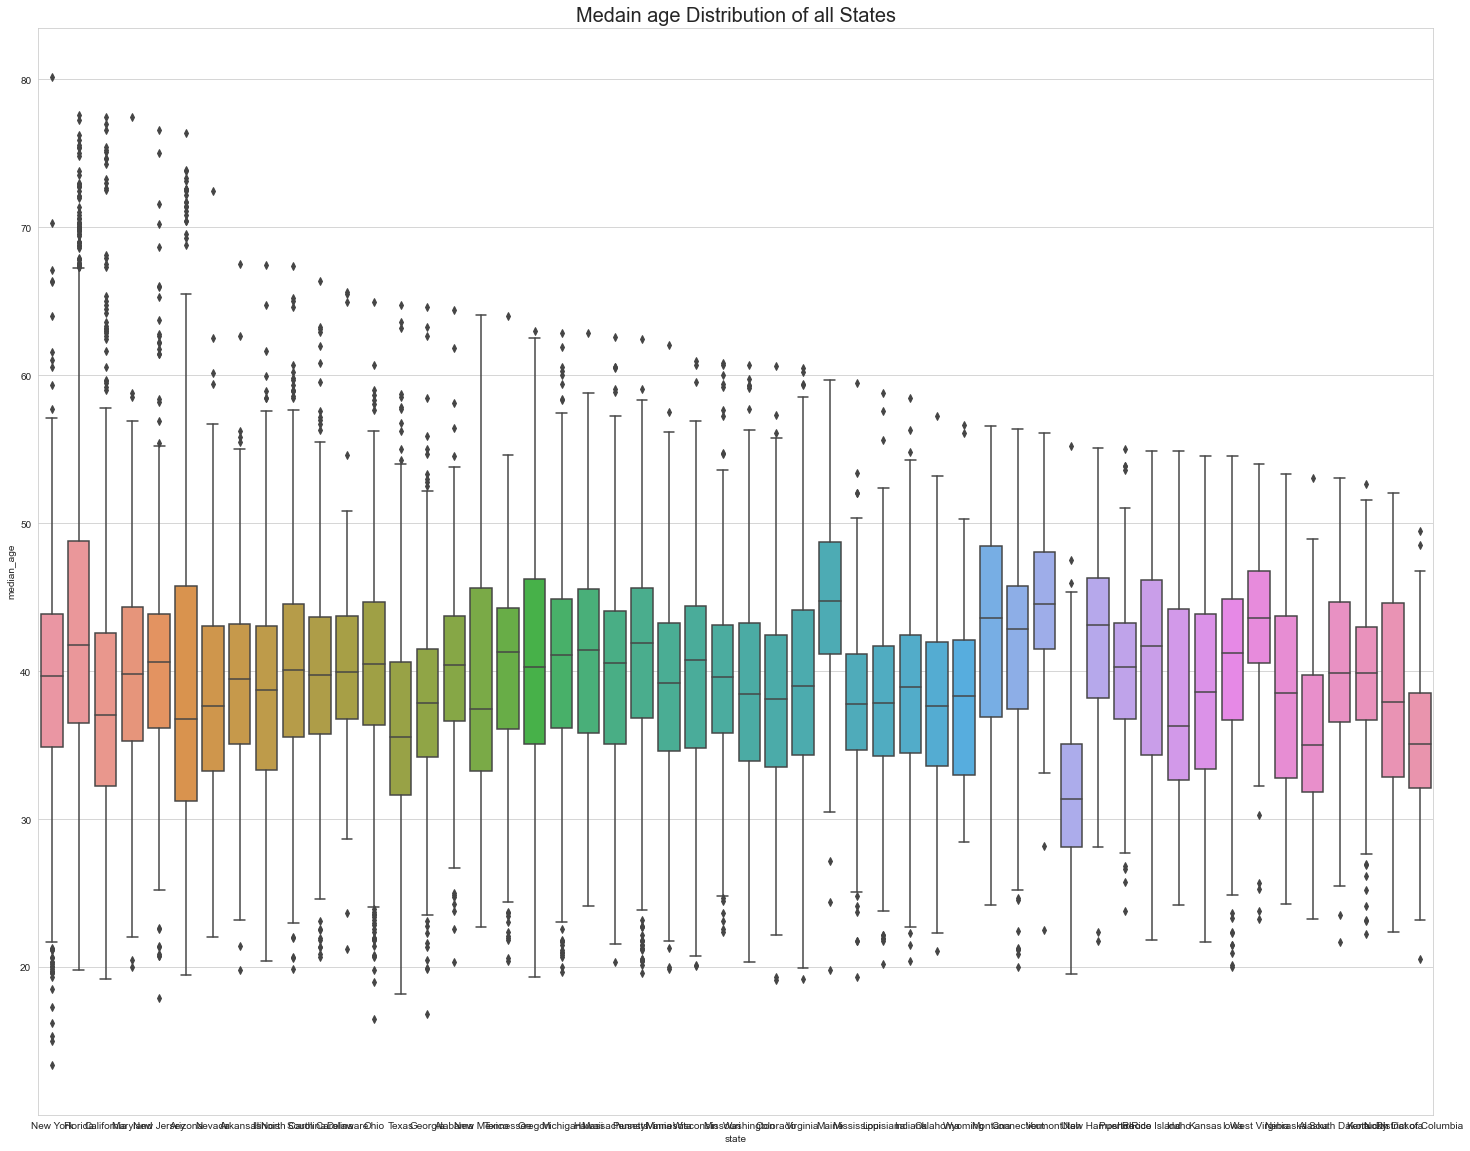

In [320]:
sns.set_style("whitegrid")
plt.figure(figsize = (25, 20))
sns.boxplot(x = 'state', y = 'median_age', data=df_train.nlargest(26585, 'median_age')).set_title('Medain age Distribution of all States', fontsize = 20)
plt.show()

In [321]:
#Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. Analyze the married, separated and divorced population for these population brackets. Visualize using appropriate chart type.

In [322]:
age_df = df_train[['state', 'city', 'place', 'pop', 'male_pop', 'female_pop', 'male_age_median', 'female_age_median', 'married', 'separated', 'divorced']]

In [323]:
age_df.head()

state        city           place   pop  male_pop  female_pop  \
UID                                                                           
267822     New York    Hamilton        Hamilton  5230      2612        2618   
246444      Indiana  South Bend        Roseland  2633      1349        1284   
245683      Indiana    Danville        Danville  6881      3643        3238   
279653  Puerto Rico    San Juan        Guaynabo  2700      1141        1559   
247218       Kansas   Manhattan  Manhattan City  5637      2586        3051   

        male_age_median  female_age_median  married  separated  divorced  
UID                                                                       
267822         44.00000           45.33333  0.57851    0.01240   0.08770  
246444         32.00000           37.58333  0.34886    0.01426   0.09030  
245683         40.83333           42.83333  0.64745    0.01607   0.10657  
279653         48.91667           50.58333  0.47257    0.02021   0.10106  
247218         22.41667           21.58333  0.12356    0.00000   0.03109

In [324]:
bins = [0, 10, 18, 35, 65, 100]
labels = ['kids', 'Youth', 'Young Adult', 'Adult', 'Senior']

In [325]:
age_df['male_population_bracket'] = pd.cut(age_df['male_age_median'], bins, labels = labels)

C:\Users\karso\AppData\Local\Temp\ipykernel_4004\1067374872.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
age_df['female_population_bracket'] = pd.cut(age_df['female_age_median'], bins, labels = labels)

C:\Users\karso\AppData\Local\Temp\ipykernel_4004\4219717780.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [327]:
age_df

state         city             place    pop  male_pop  \
UID                                                                    
267822      New York     Hamilton          Hamilton   5230      2612   
246444       Indiana   South Bend          Roseland   2633      1349   
245683       Indiana     Danville          Danville   6881      3643   
279653   Puerto Rico     San Juan          Guaynabo   2700      1141   
247218        Kansas    Manhattan    Manhattan City   5637      2586   
...              ...          ...               ...    ...       ...   
279212   Puerto Rico        Coamo             Coamo   1847       909   
277856  Pennsylvania    Blue Bell         Blue Bell   4155      2116   
233000      Colorado      Weldona      Saddle Ridge   2829      1465   
287425         Texas  Colleyville  Colleyville City  11542      5727   
265371        Nevada    Las Vegas          Paradise   3726      1815   

        female_pop  male_age_median  female_age_median  married  separated  \
UID                                                                          
267822        2618         44.00000           45.33333  0.57851    0.01240   
246444        1284         32.00000           37.58333  0.34886    0.01426   
245683        3238         40.83333           42.83333  0.64745    0.01607   
279653        1559         48.91667           50.58333  0.47257    0.02021   
247218        3051         22.41667           21.58333  0.12356    0.00000   
...            ...              ...                ...      ...        ...   
279212         938         41.66667           40.16667  0.24603    0.02249   
277856        2039         38.83333           39.50000  0.61127    0.02473   
233000        1364         42.00000           46.33333  0.70451    0.00520   
287425        5815         46.66667           43.41667  0.75503    0.00915   
265371        1911         32.50000           29.83333  0.34426    0.03005   

        divorced male_population_bracket female_population_bracket  
UID                                                                 
267822   0.08770                   Adult                     Adult  
246444   0.09030             Young Adult                     Adult  
245683   0.10657                   Adult                     Adult  
279653   0.10106                   Adult                     Adult  
247218   0.03109             Young Adult               Young Adult  
...          ...                     ...                       ...  
279212   0.14683                   Adult                     Adult  
277856   0.04888                   Adult                     Adult  
233000   0.07712                   Adult                     Adult  
287425   0.05261                   Adult                     Adult  
265371   0.13320             Young Adult               Young Adult  

[26585 rows x 13 columns]

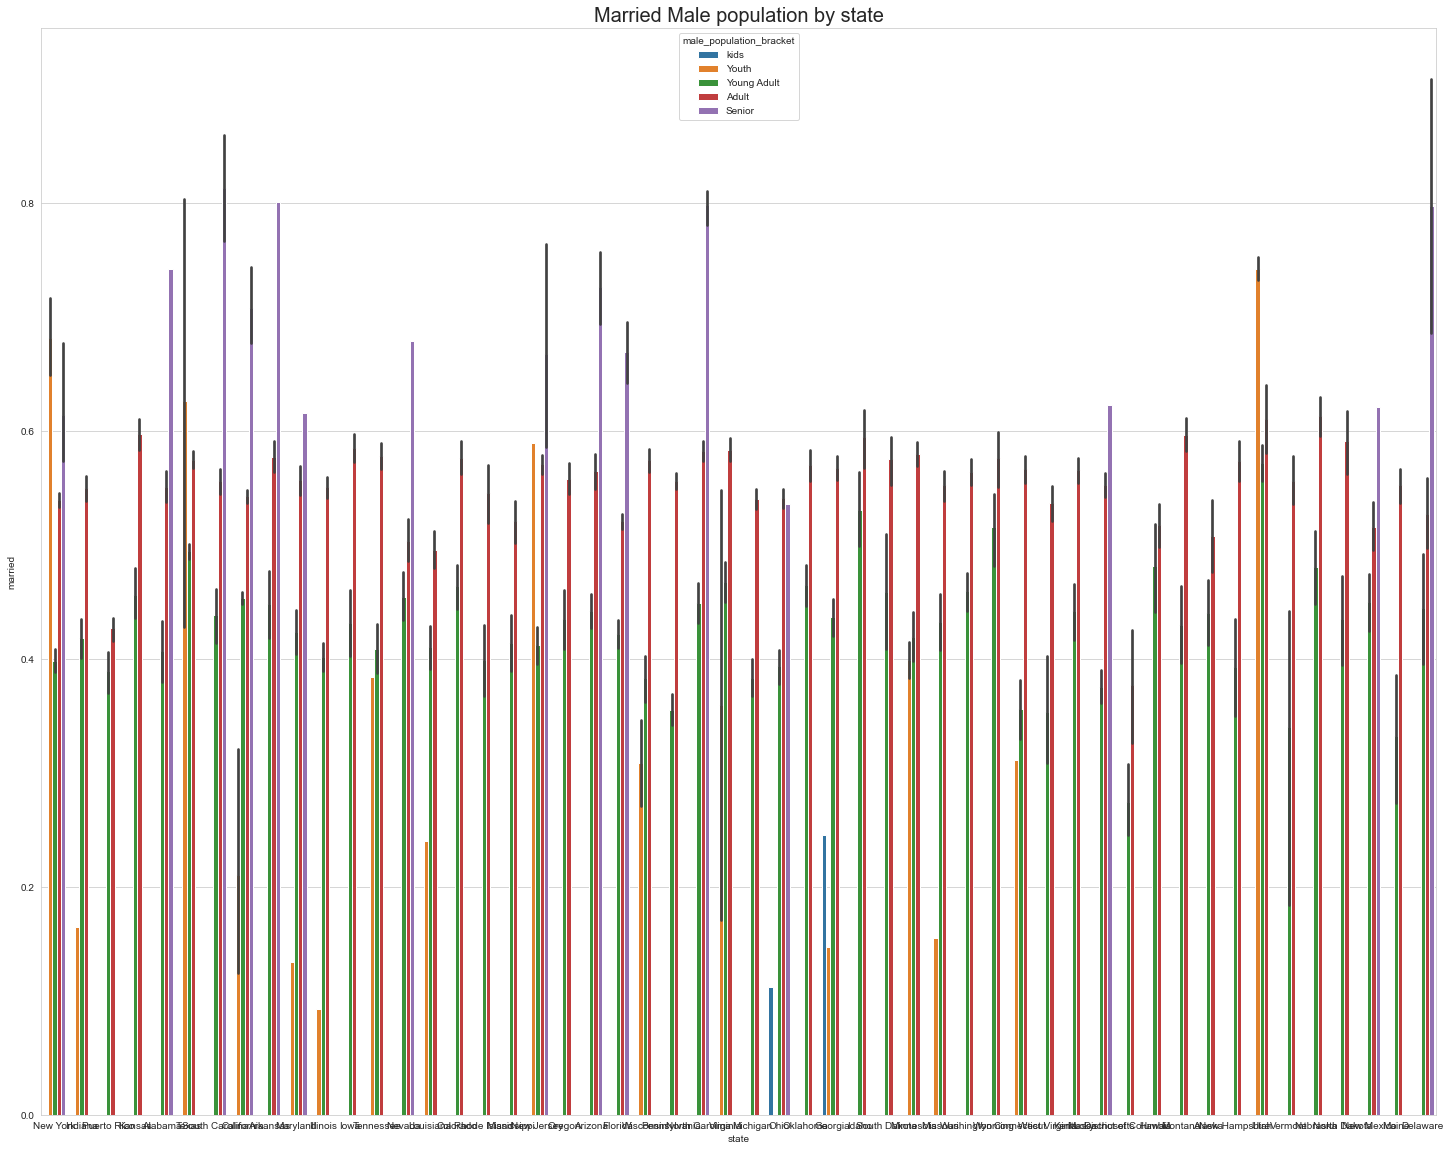

In [328]:
plt.figure(figsize = (25, 20))

ax = sns.barplot(x = 'state', y = 'married', hue = 'male_population_bracket', data = age_df)

ax.set_title('Married Male population by state', fontsize = 20)

plt.show()

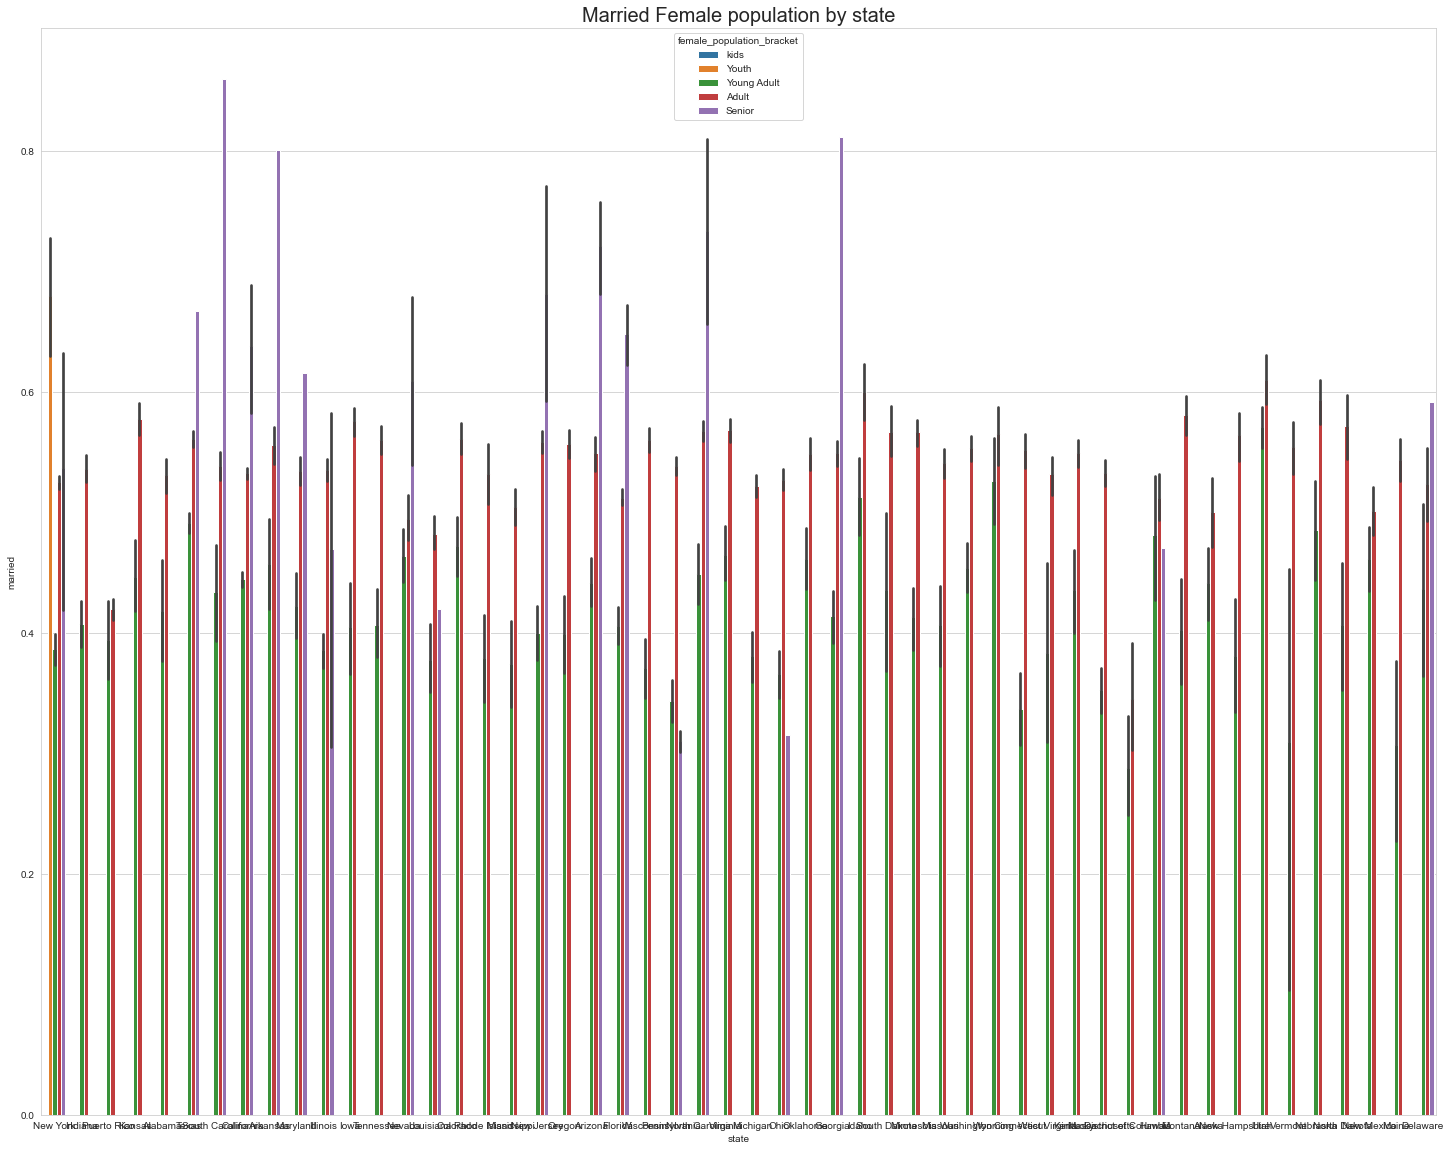

In [329]:
plt.figure(figsize = (25, 20))

ax = sns.barplot(x = 'state', y = 'married', hue = 'female_population_bracket', data = age_df)

ax.set_title('Married Female population by state', fontsize = 20)

plt.show()

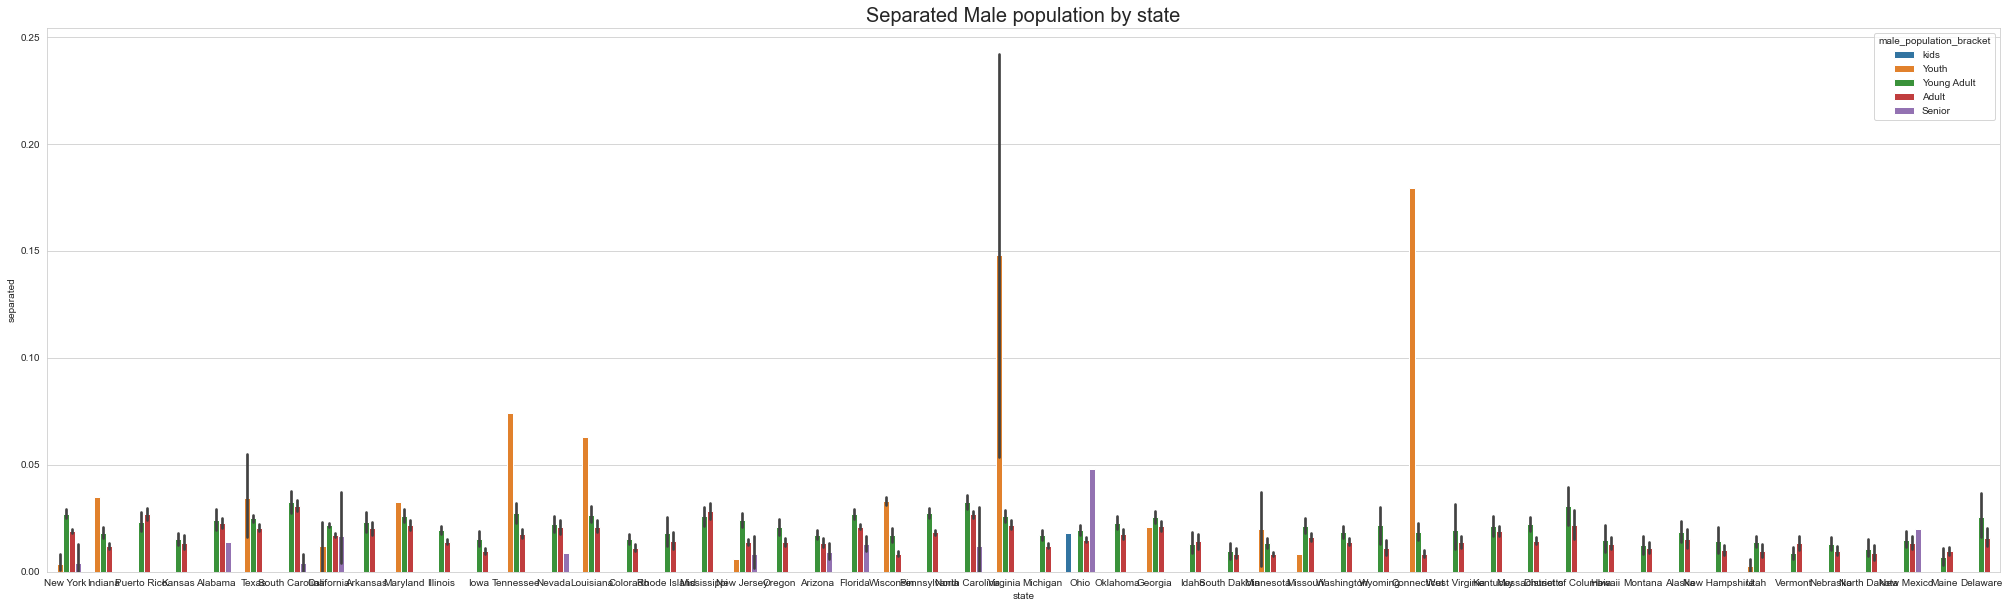

In [330]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'male_population_bracket', data = age_df)
           
ax.set_title('Separated Male population by state', fontsize = 20)

plt.show()

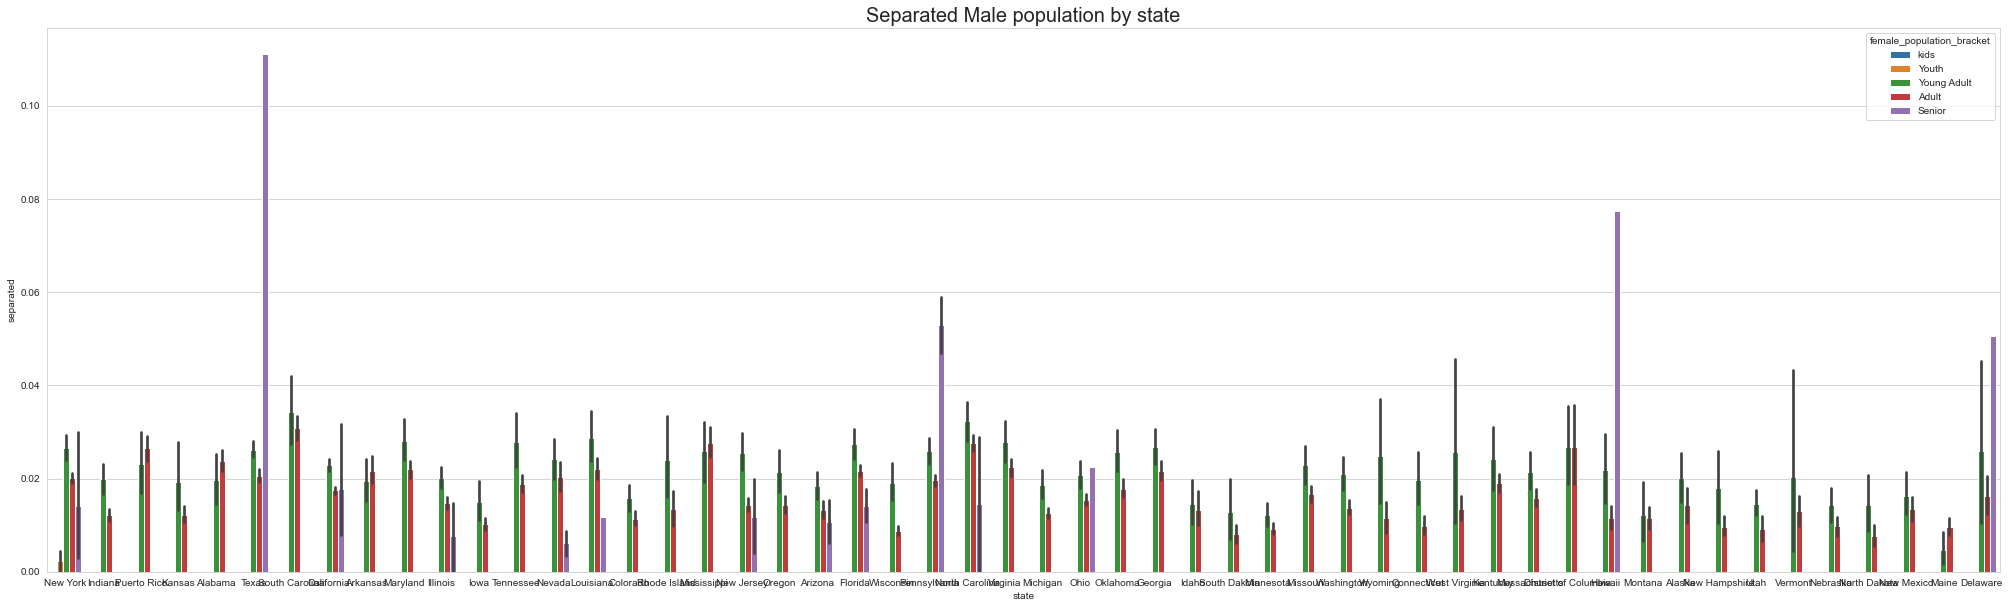

In [331]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'separated', hue = 'female_population_bracket', data = age_df)
           
ax.set_title('Separated Male population by state', fontsize = 20)

plt.show()

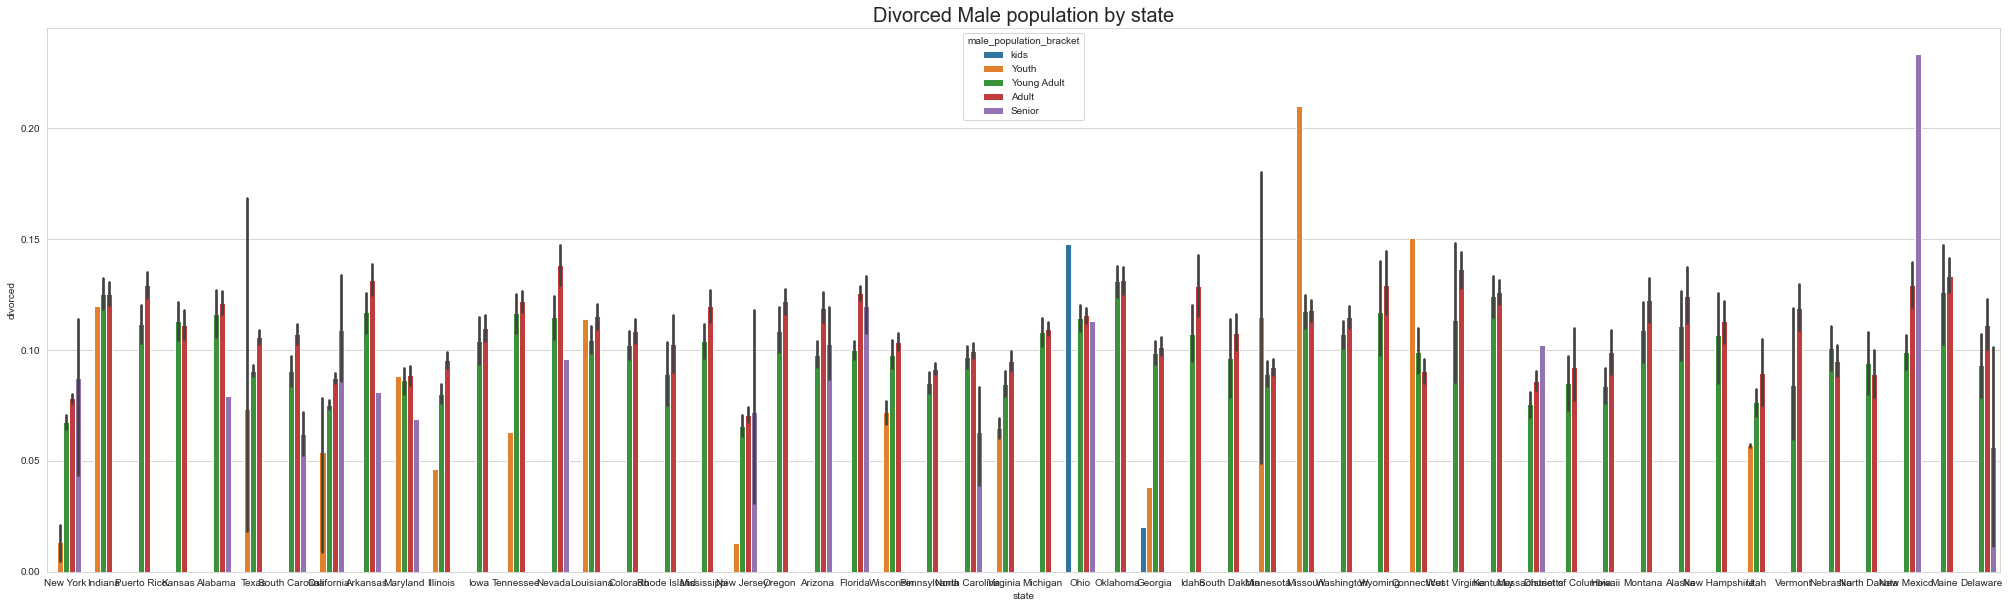

In [332]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'male_population_bracket', data = age_df)
           
ax.set_title('Divorced Male population by state', fontsize = 20)

plt.show()

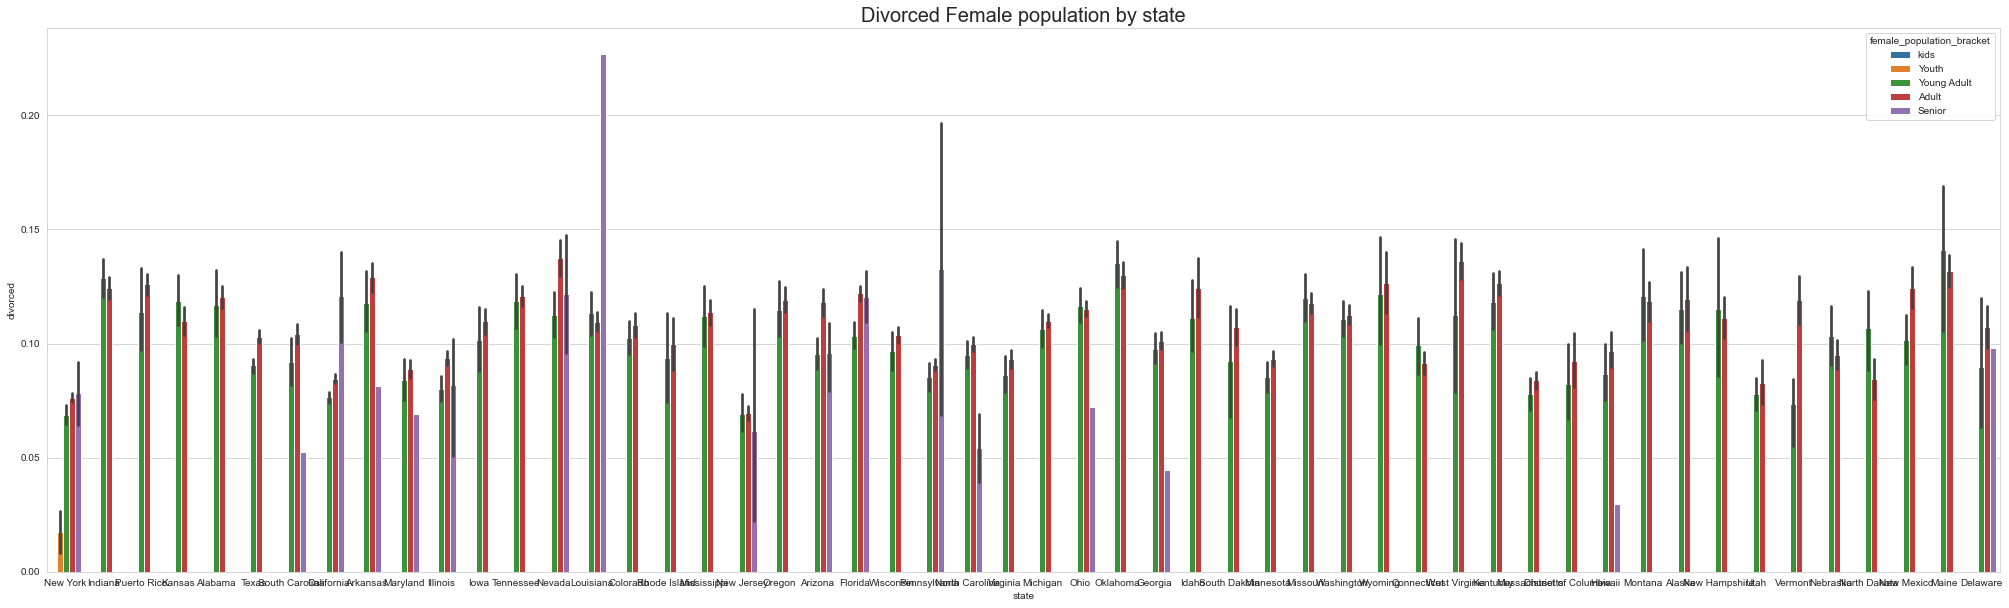

In [333]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))

ax = sns.barplot(x = 'state', y = 'divorced', hue = 'female_population_bracket', data = age_df)
           
ax.set_title('Divorced Female population by state', fontsize = 20)

plt.show()

In [334]:
#Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [335]:
df_train.head()

SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
UID                                                                     
267822       140        53       36     New York       NY    Hamilton   
246444       140       141       18      Indiana       IN  South Bend   
245683       140        63       18      Indiana       IN    Danville   
279653       140       127       72  Puerto Rico       PR    San Juan   
247218       140       161       20       Kansas       KS   Manhattan   

                 place   type  zip_code  area_code  ...  pct_own  married  \
UID                                                 ...                     
267822        Hamilton   City     13346        315  ...  0.79046  0.57851   
246444        Roseland   City     46616        574  ...  0.52483  0.34886   
245683        Danville   City     46122        317  ...  0.85331  0.64745   
279653        Guaynabo  Urban       927        787  ...  0.65037  0.47257   
247218  Manhattan City   City     66502        785  ...  0.13046  0.12356   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   

        remaining_income  pop_density  median_age  
UID                                                
267822            5125.0     0.000026   44.667430  
246444            7837.0     0.001687   34.722748  
245683           10431.0     0.000099   41.774472  
279653            6554.0     0.002442   49.879012  
247218           27775.0     0.002207   21.965629  

[5 rows x 82 columns]

In [336]:
df_train['overall_rent'] = round((df_train['rent_median'] / df_train['hi_median']) * 100, 2)
df_train

SUMLEVEL  COUNTYID  STATEID         state state_ab         city  \
UID                                                                       
267822       140        53       36      New York       NY     Hamilton   
246444       140       141       18       Indiana       IN   South Bend   
245683       140        63       18       Indiana       IN     Danville   
279653       140       127       72   Puerto Rico       PR     San Juan   
247218       140       161       20        Kansas       KS    Manhattan   
...          ...       ...      ...           ...      ...          ...   
279212       140        43       72   Puerto Rico       PR        Coamo   
277856       140        91       42  Pennsylvania       PA    Blue Bell   
233000       140        87        8      Colorado       CO      Weldona   
287425       140       439       48         Texas       TX  Colleyville   
265371       140         3       32        Nevada       NV    Las Vegas   

                   place     type  zip_code  area_code  ...  married  \
UID                                                     ...            
267822          Hamilton     City     13346        315  ...  0.57851   
246444          Roseland     City     46616        574  ...  0.34886   
245683          Danville     City     46122        317  ...  0.64745   
279653          Guaynabo    Urban       927        787  ...  0.47257   
247218    Manhattan City     City     66502        785  ...  0.12356   
...                  ...      ...       ...        ...  ...      ...   
279212             Coamo    Urban       769        787  ...  0.24603   
277856         Blue Bell  Borough     19422        215  ...  0.61127   
233000      Saddle Ridge     City     80653        970  ...  0.70451   
287425  Colleyville City     Town     76034        817  ...  0.75503   
265371          Paradise     City     89123        702  ...  0.34426   

        married_snp  separated  divorced  bad_debt           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   
...             ...        ...       ...       ...            ...   
279212      0.03042    0.02249   0.14683   0.00000            NaN   
277856      0.05003    0.02473   0.04888   0.20908        50-100%   
233000      0.01386    0.00520   0.07712   0.07857  less than 50%   
287425      0.02287    0.00915   0.05261   0.14305        50-100%   
265371      0.03825    0.03005   0.13320   0.18362        50-100%   

        remaining_income  pop_density  median_age  overall_rent  
UID                                                              
267822            5125.0     0.000026   44.667430          1.63  
246444            7837.0     0.001687   34.722748          2.41  
245683           10431.0     0.000099   41.774472          0.94  
279653            6554.0     0.002442   49.879012          2.07  
247218           27775.0     0.002207   21.965629          3.92  
...                  ...          ...         ...           ...  
279212            3443.0     0.002650   40.904894          3.15  
277856            5029.0     0.000818   39.160488          1.65  
233000            8514.0     0.000002   44.089311          1.14  
287425           27404.0     0.000619   45.029280          1.24  
265371            4472.0     0.000478   31.132312          2.43  

[26585 rows x 83 columns]

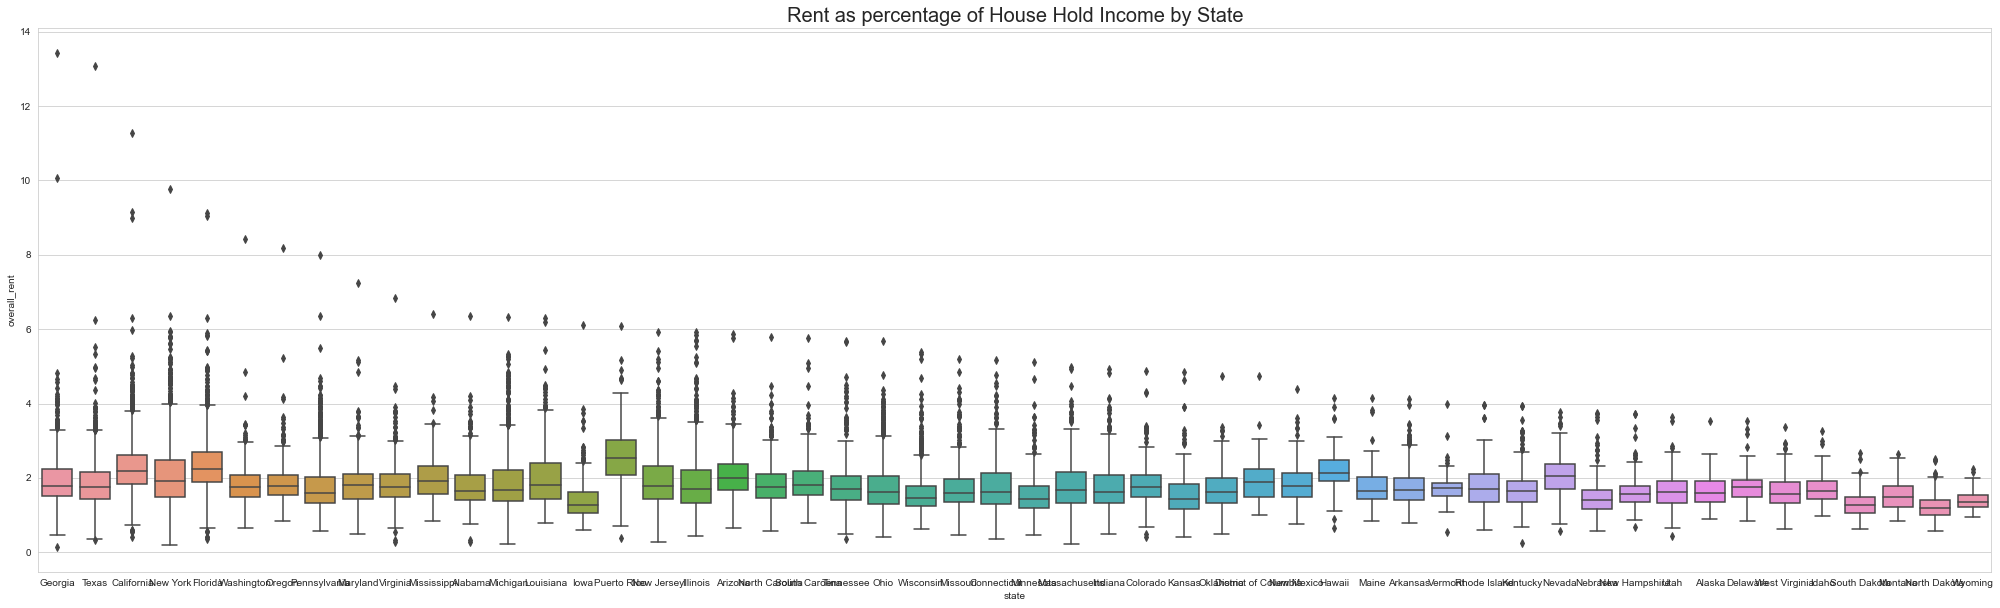

In [337]:
sns.set_style("whitegrid")
plt.figure(figsize = (35, 10))
ax = sns.boxplot(x = 'state', y = 'overall_rent', data = df_train.nlargest(26585, 'overall_rent')).set_title('Rent as percentage of House Hold Income by State', fontsize = 20)
#ax.set(ylim=(0, 100))
plt.show()

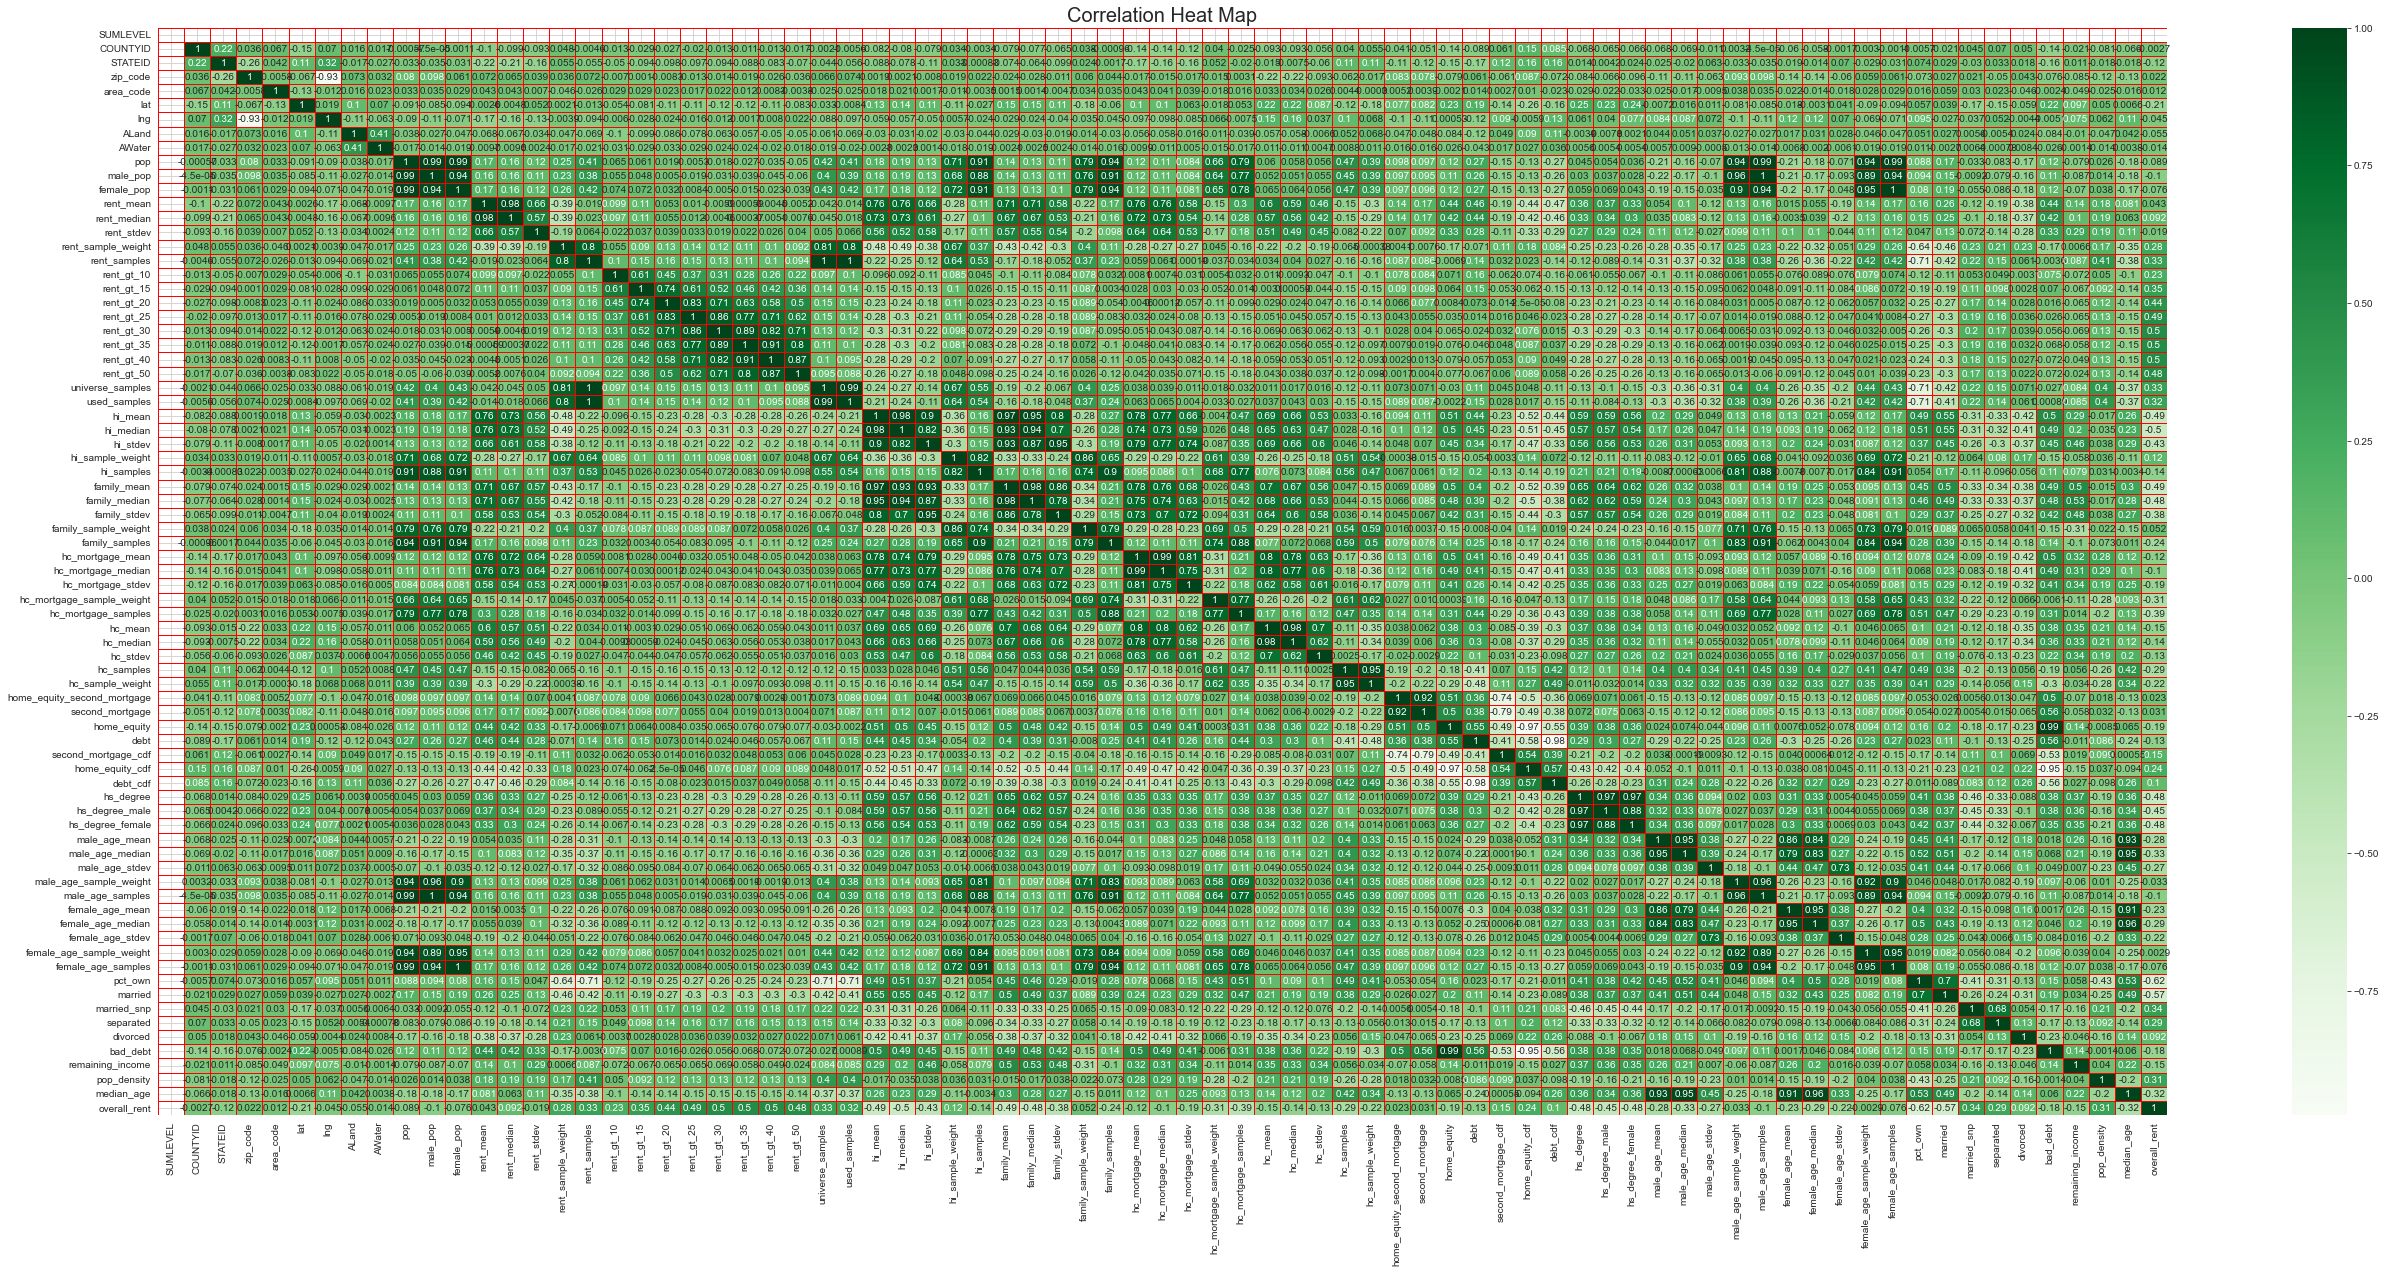

In [338]:
#Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings. 
sns.set_style("whitegrid")
corr = df_train.corr()
plt.figure(figsize=(45,20))
sns.heatmap(data = corr, cmap="Greens", annot = True, linewidths=1, linecolor='red').set_title('Correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

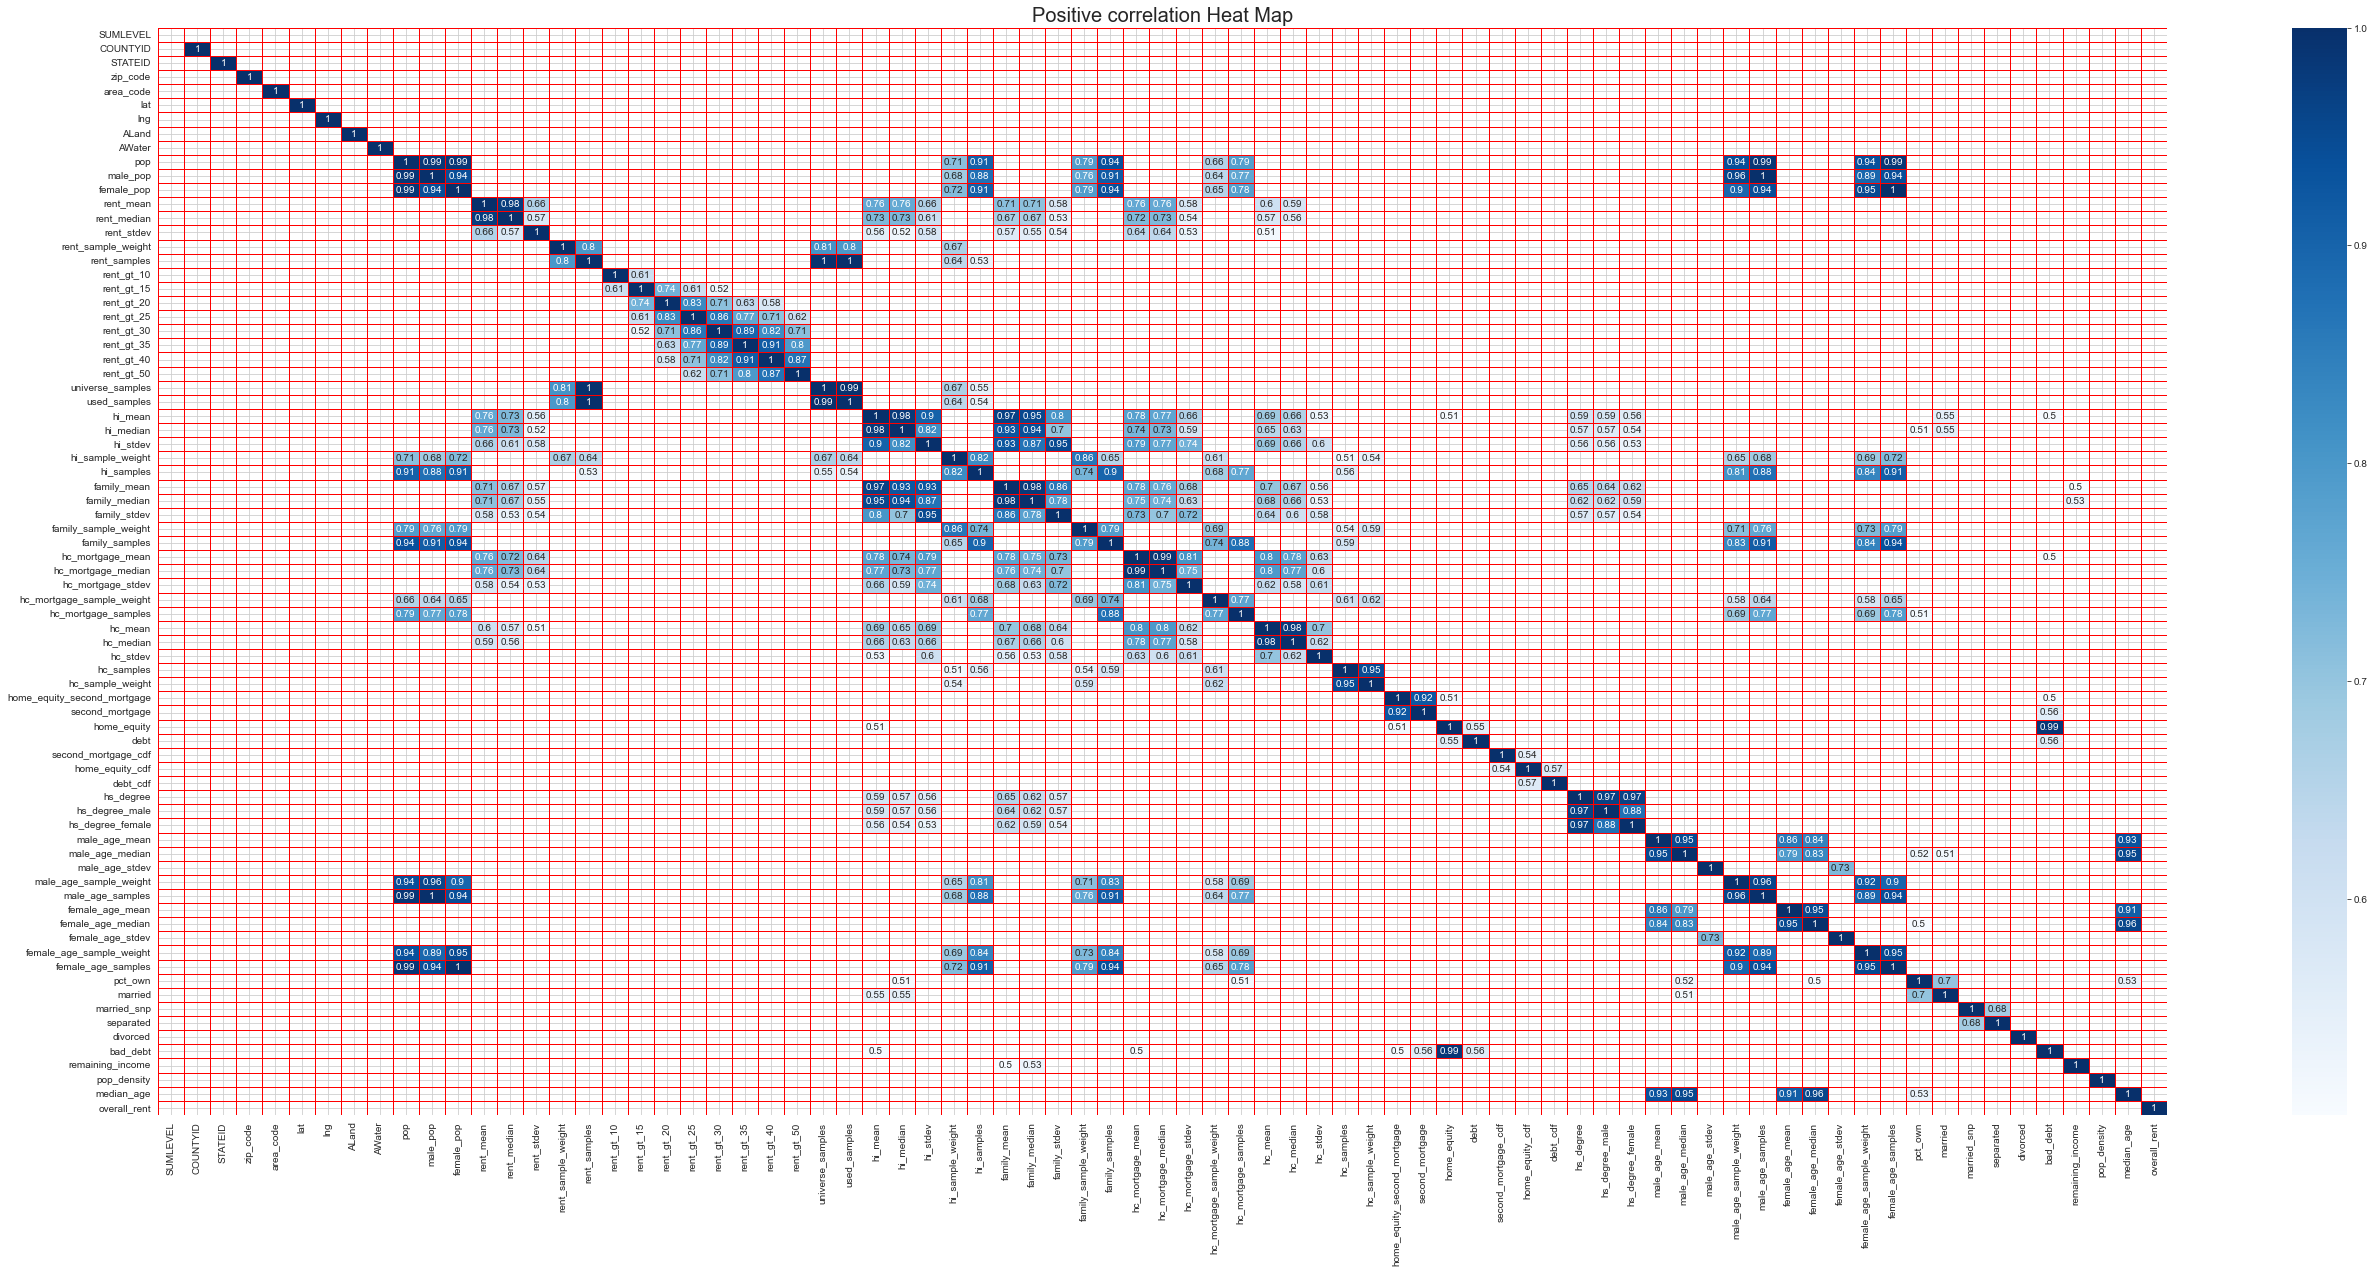

In [339]:
sns.set_style("whitegrid")
corr = df_train.corr()
kot = corr[corr >= .5]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Blues", annot = True, linewidths=1, linecolor='red').set_title('Positive correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

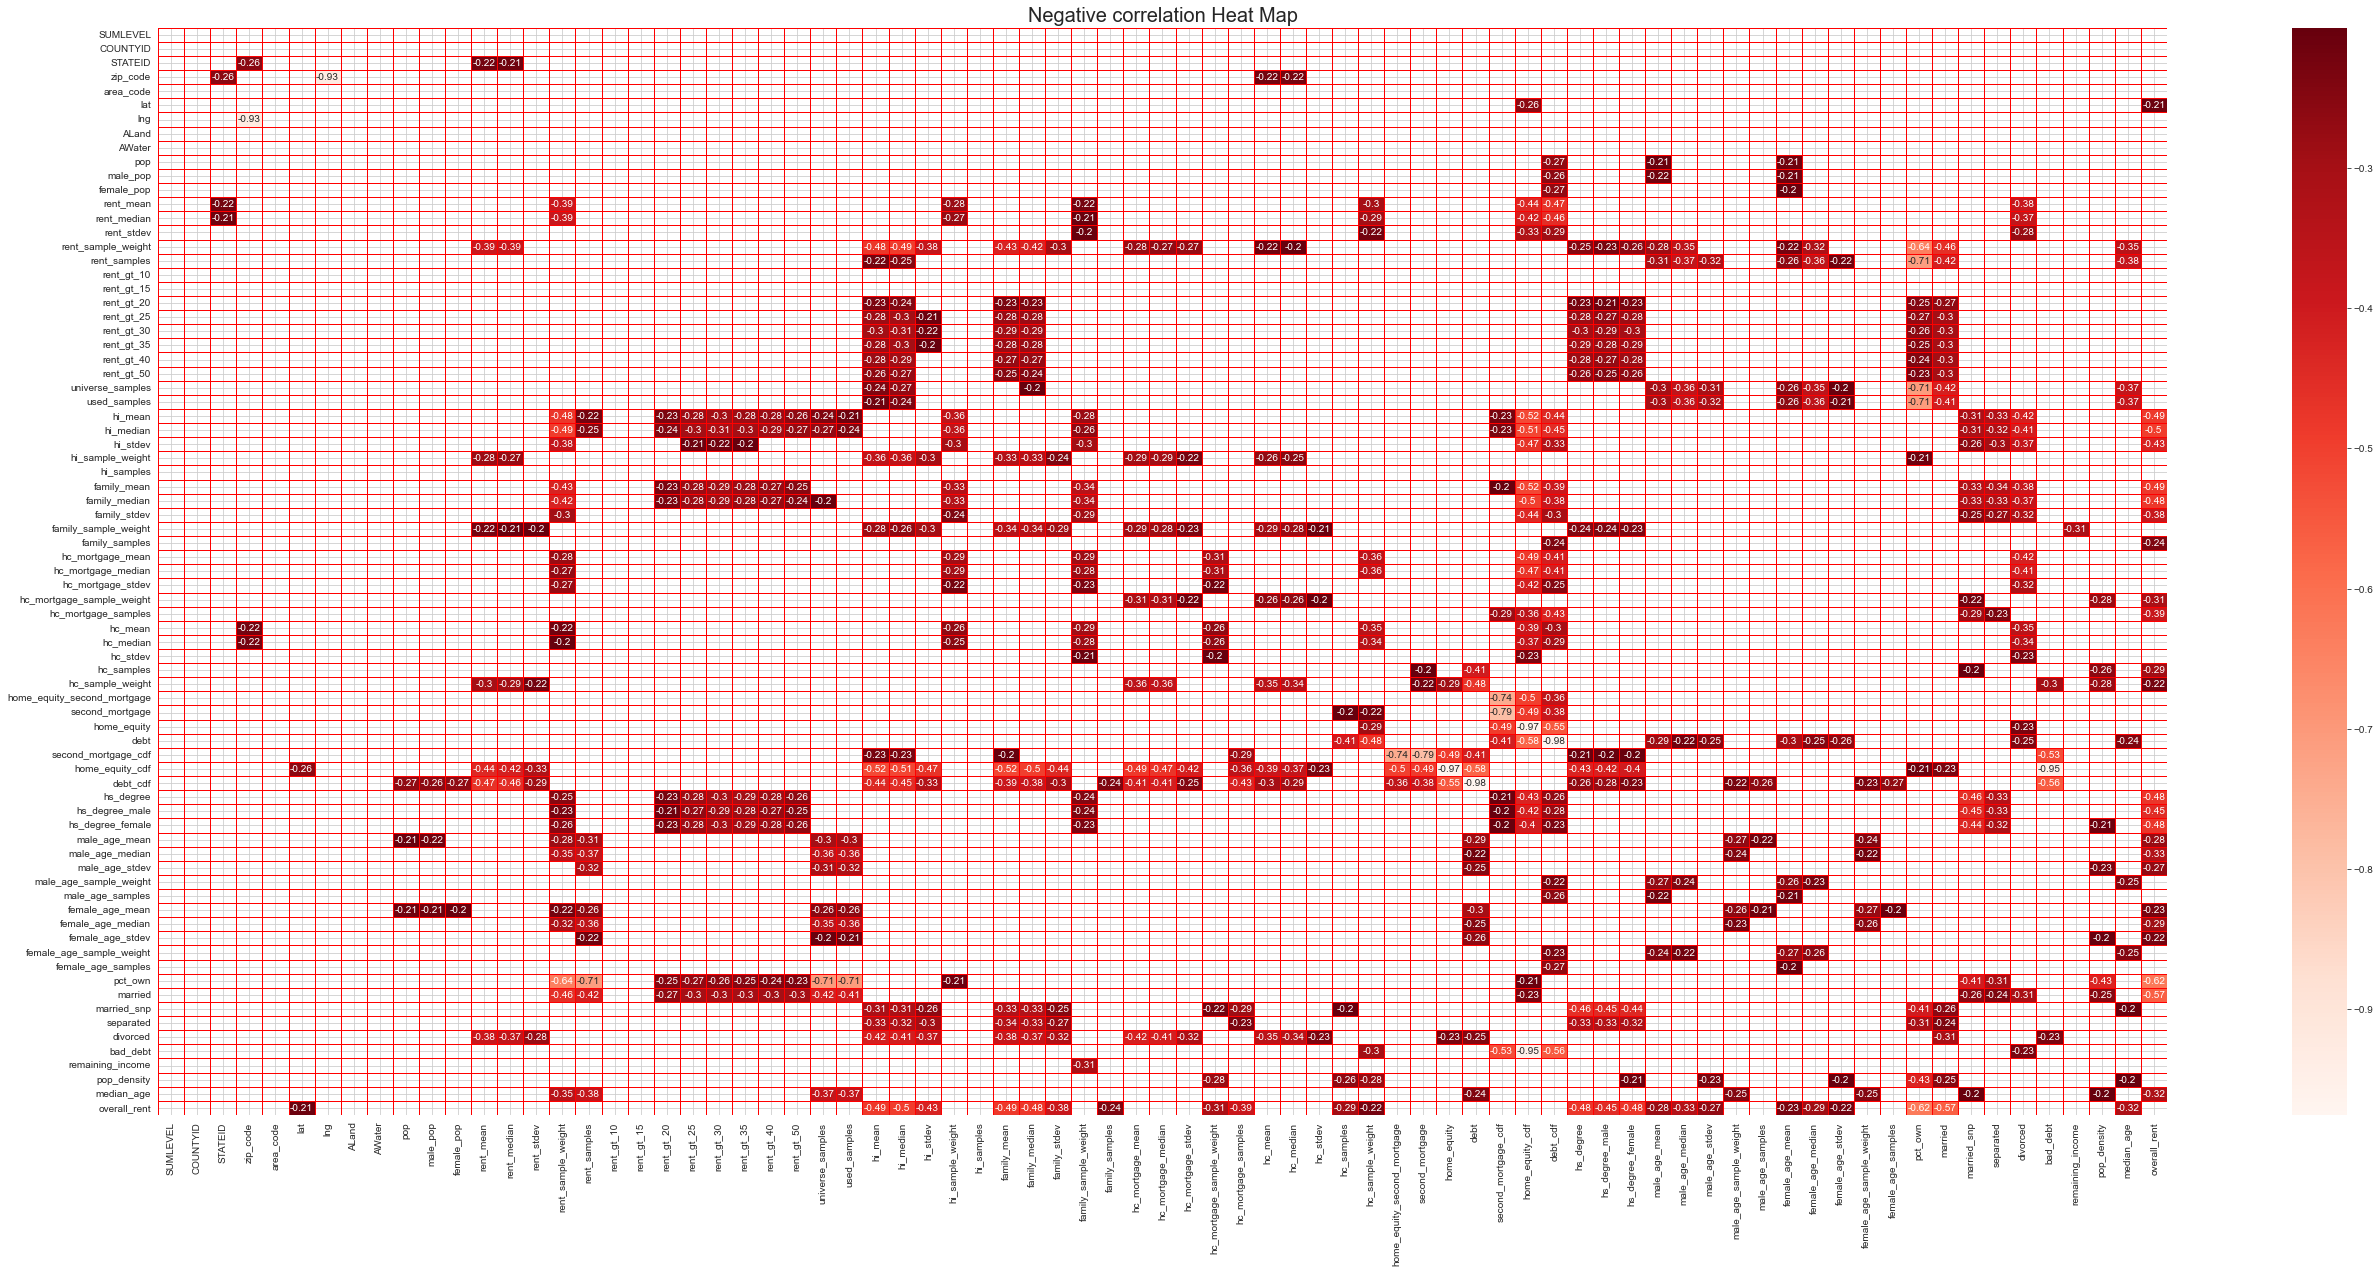

In [340]:
sns.set_style("whitegrid")
corr = df_train.corr()
kot = corr[corr <=-.2]
plt.figure(figsize=(45,20))
sns.heatmap(kot, cmap="Reds", annot = True, linewidths=1, linecolor='red').set_title('Negative correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

In [341]:
#The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data
#	Highschool graduation rates
#	Median population age
#	Second Mortgage Statistics
#	Percent Own
#	Bad Debt Expense

In [342]:
from sklearn.decomposition import FactorAnalysis

In [343]:
fa = FactorAnalysis(n_components = 5, random_state = 11)

In [344]:
train_transformed = fa.fit_transform(df_train.select_dtypes(exclude=('object','category')))

In [345]:
train_transformed.shape

(26585, 5)

In [346]:
df_train.drop(['SUMLEVEL'], axis = 1, inplace = True)

In [347]:
df_train.dropna(axis = 0, inplace = True)

In [348]:
df_train.drop_duplicates(inplace = True)

In [349]:
df_train.shape

(25367, 82)

In [350]:
df_test.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   
248614      NaN       140       231       21      Kentucky       KY   
286865      NaN       140       355       48         Texas       TX   

                  city                  place     type primary  ...  \
UID                                                             ...   
255504         Detroit  Dearborn Heights City      CDP   tract  ...   
252676          Auburn            Auburn City     City   tract  ...   
276314       Pine City              Millerton  Borough   tract  ...   
248614      Monticello        Monticello City     City   tract  ...   
286865  Corpus Christi                  Edroy     Town   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   
248614         44.81200           48.00000          21.03155   
286865         40.66618           42.66667          21.30900   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   
248614                 263.94320              1081.0  0.84609  0.56953   
286865                 709.90829              2956.0  0.79077  0.57620   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  
248614      0.05492    0.04694   0.12489  
286865      0.01726    0.00588   0.16379  

[5 rows x 79 columns]

In [351]:
df_test.drop(['BLOCKID', 'SUMLEVEL'], axis=1, inplace =True)

In [352]:
df_test.isna().sum()

COUNTYID         0
STATEID          0
state            0
state_ab         0
city             0
              ... 
pct_own        122
married         84
married_snp     84
separated       84
divorced        84
Length: 77, dtype: int64

In [353]:
df_test.dropna(axis = 0, inplace = True)

In [354]:
df_test.drop_duplicates(inplace = True)

In [355]:
df_test.shape

(11355, 77)

In [356]:
imp_feature = df_train.select_dtypes(exclude=('object','category'))

In [357]:
imp_feature.head()

COUNTYID  STATEID  zip_code  area_code        lat        lng  \
UID                                                                    
267822        53       36     13346        315  42.840812 -75.501524   
246444       141       18     46616        574  41.701441 -86.266614   
245683        63       18     46122        317  39.792202 -86.515246   
279653       127       72       927        787  18.396103 -66.104169   
247218       161       20     66502        785  39.195573 -96.569366   

              ALand   AWater   pop  male_pop  ...  pct_own  married  \
UID                                           ...                     
267822  202183361.0  1699120  5230      2612  ...  0.79046  0.57851   
246444    1560828.0   100363  2633      1349  ...  0.52483  0.34886   
245683   69561595.0   284193  6881      3643  ...  0.85331  0.64745   
279653    1105793.0        0  2700      1141  ...  0.65037  0.47257   
247218    2554403.0        0  5637      2586  ...  0.13046  0.12356   

        married_snp  separated  divorced  bad_debt  remaining_income  \
UID                                                                    
267822      0.01882    0.01240   0.08770   0.09408            5125.0   
246444      0.01426    0.01426   0.09030   0.04274            7837.0   
245683      0.02830    0.01607   0.10657   0.09512           10431.0   
279653      0.02021    0.02021   0.10106   0.01086            6554.0   
247218      0.00000    0.00000   0.03109   0.05426           27775.0   

        pop_density  median_age  overall_rent  
UID                                            
267822     0.000026   44.667430          1.63  
246444     0.001687   34.722748          2.41  
245683     0.000099   41.774472          0.94  
279653     0.002442   49.879012          2.07  
247218     0.002207   21.965629          3.92  

[5 rows x 76 columns]

In [358]:
imp_feature.shape

(25367, 76)

In [359]:
to_drop = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [360]:
for col in imp_feature.columns:
    if col in to_drop:
        imp_feature.drop(col,axis=1,inplace=True)

In [361]:
imp_feature.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  \
UID                                                                   
267822  202183361.0  1699120  5230      2612        2618  769.38638   
246444    1560828.0   100363  2633      1349        1284  804.87924   
245683   69561595.0   284193  6881      3643        3238  742.77365   
279653    1105793.0        0  2700      1141        1559  803.42018   
247218    2554403.0        0  5637      2586        3051  938.56493   

        rent_median  rent_stdev  rent_sample_weight  rent_samples  ...  \
UID                                                                ...   
267822        784.0   232.63967           272.34441         362.0  ...   
246444        848.0   253.46747           312.58622         513.0  ...   
245683        703.0   323.39011           291.85520         378.0  ...   
279653        782.0   297.39258           259.30316         368.0  ...   
247218        881.0   392.44096          1005.42886        1704.0  ...   

        pct_own  married  married_snp  separated  divorced  bad_debt  \
UID                                                                    
267822  0.79046  0.57851      0.01882    0.01240   0.08770   0.09408   
246444  0.52483  0.34886      0.01426    0.01426   0.09030   0.04274   
245683  0.85331  0.64745      0.02830    0.01607   0.10657   0.09512   
279653  0.65037  0.47257      0.02021    0.02021   0.10106   0.01086   
247218  0.13046  0.12356      0.00000    0.00000   0.03109   0.05426   

        remaining_income  pop_density  median_age  overall_rent  
UID                                                              
267822            5125.0     0.000026   44.667430          1.63  
246444            7837.0     0.001687   34.722748          2.41  
245683           10431.0     0.000099   41.774472          0.94  
279653            6554.0     0.002442   49.879012          2.07  
247218           27775.0     0.002207   21.965629          3.92  

[5 rows x 70 columns]

In [362]:
df_train_features = imp_feature[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [363]:
df_train_features.head()

pop  rent_median  hi_median  family_median    hc_mean  \
UID                                                              
267822  5230        784.0    48120.0        53245.0  570.01530   
246444  2633        848.0    35186.0        43023.0  351.98293   
245683  6881        703.0    74964.0        85395.0  556.45986   
279653  2700        782.0    37845.0        44399.0  288.04047   
247218  5637        881.0    22497.0        50272.0  443.68855   

        second_mortgage  home_equity     debt  hs_degree  pct_own  married  \
UID                                                                          
267822          0.02077      0.08919  0.52963    0.89288  0.79046  0.57851   
246444          0.02222      0.04274  0.60855    0.90487  0.52483  0.34886   
245683          0.00000      0.09512  0.73484    0.94288  0.85331  0.64745   
279653          0.01086      0.01086  0.52714    0.91500  0.65037  0.47257   
247218          0.05426      0.05426  0.51938    1.00000  0.13046  0.12356   

        separated  divorced  
UID                          
267822    0.01240   0.08770  
246444    0.01426   0.09030  
245683    0.01607   0.10657  
279653    0.02021   0.10106  
247218    0.00000   0.03109

In [364]:
df_train_features.shape

(25367, 13)

In [365]:
y_train = imp_feature['hc_mortgage_mean']

In [366]:
df_test_feature = df_test[['pop','rent_median','hi_median','family_median','hc_mean','second_mortgage','home_equity','debt','hs_degree','pct_own','married','separated','divorced']]

In [367]:
#Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. 
#Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.

In [368]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

In [369]:
le.fit(df_train_features, y_train)

LinearRegression()

In [370]:
y_pred = le.predict(df_test_feature)

In [371]:
y_test = df_test['hc_mortgage_mean']

In [372]:
from sklearn.metrics import r2_score,mean_squared_error

In [373]:
r2_score(y_test,y_pred)

0.8074184771853142

In [374]:
np.sqrt(mean_squared_error(y_test,y_pred))

277.0184857834568

C:\Users\karso\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



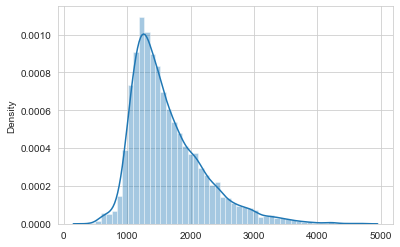

In [375]:
sns.distplot(y_pred)
plt.show()